# Goal: Unsupervised Learning Clustering algorithms on Network Packet Data

There is not one method that does clustering perfectly. There are several methods to choose from and we will explore them below. 

Summary of methods: 

Method 1: PCA to 2D, then used elbow method to determine the amount of clusters to be used in Kmeans clustering.
-Method 1 was the best method.

Method 2: PCA 2D to Gaussian Mixture clustering algorithm


Method 3: PCA to 3D, then used elbow method to determine the amount of clusters to be used in Kmeans clustering.


Method 4 PCA + t-SNE dimensional reduction, did not successfully reduce data to clusters.


In [1]:
#Dataframe library
import pandas as pd 

#Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt 

#Numpy arrary libraries
import numpy as np
from numpy import unique
from numpy import where

#Data Transformation libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#3D plotting
from mpl_toolkits.mplot3d import Axes3D

#Elbow Method Visualizer Library
from yellowbrick.cluster import KElbowVisualizer

# import Clustering libraries
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import hdbscan
import sklearn.cluster as cluster

#Time calculator library
import time

In [2]:
ARP_df = pd.read_csv('ARP_MitM_dataset.csv')

#Read the header of the data, to check if data was loaded
#ARP_df.head()

#check how big df is
ARP_df.shape

(2504266, 115)

## Exploring each features in distribution plots.

/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

/Users/joey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


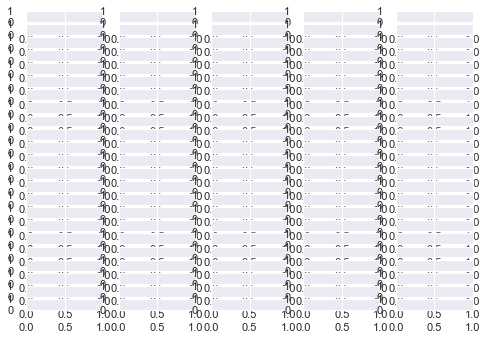

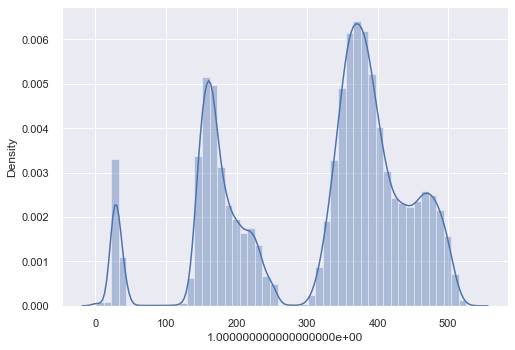

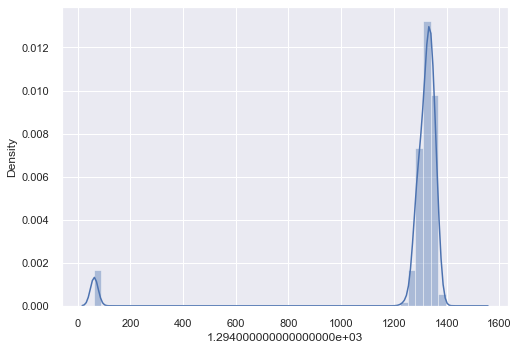

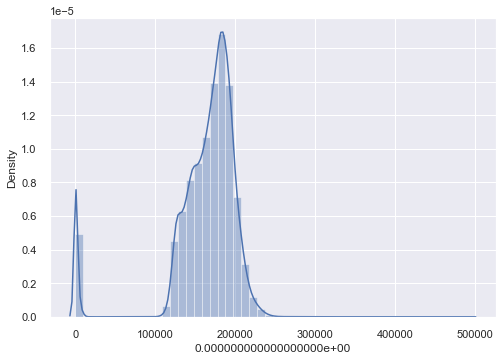

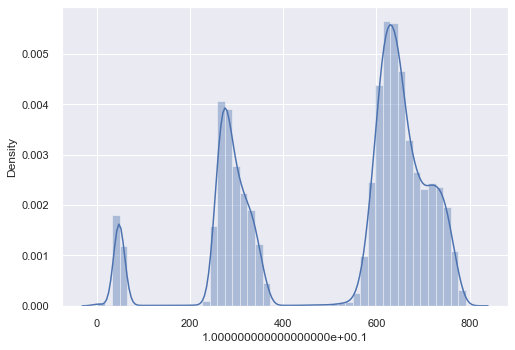

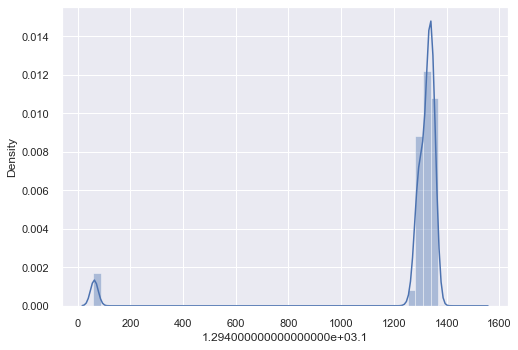

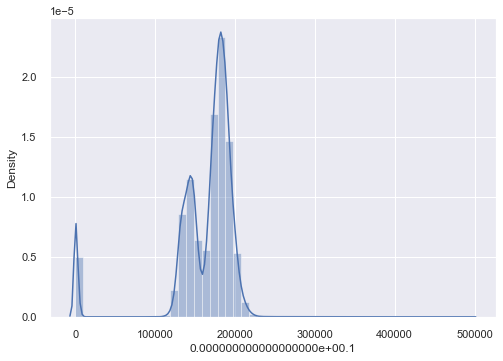

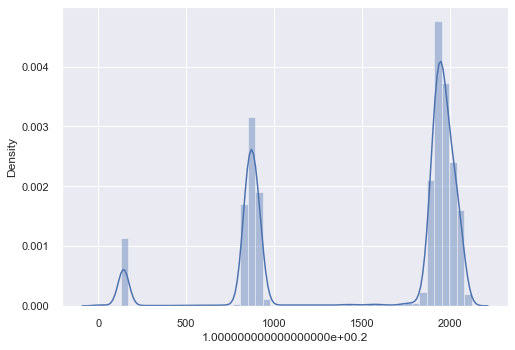

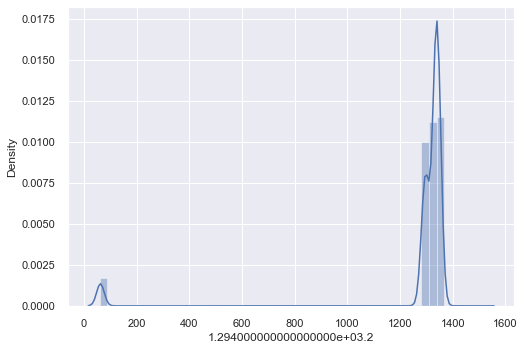

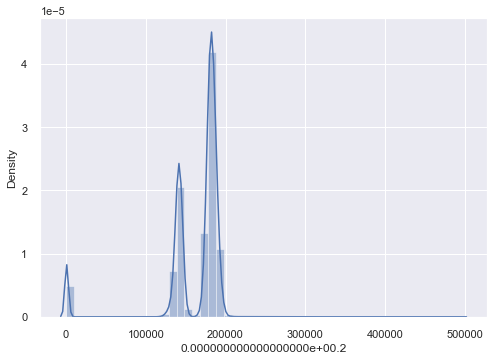

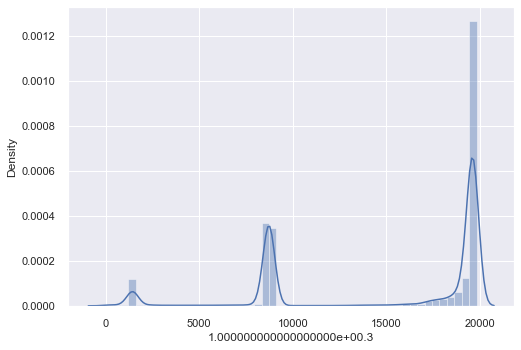

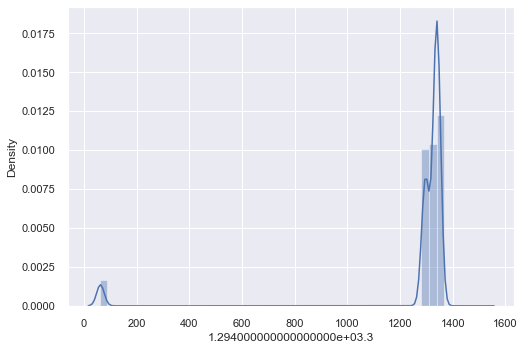

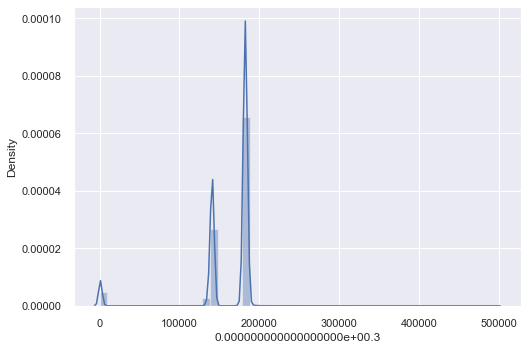

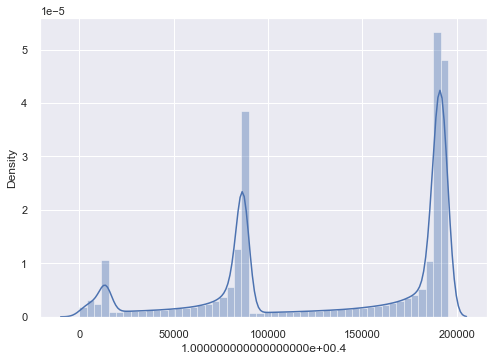

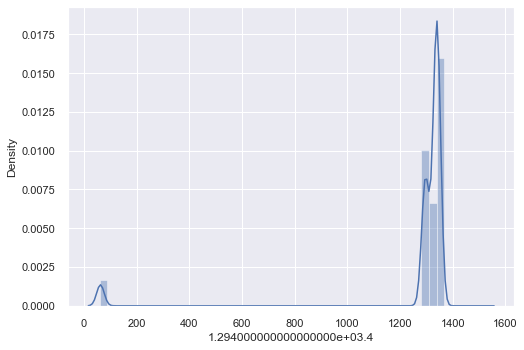

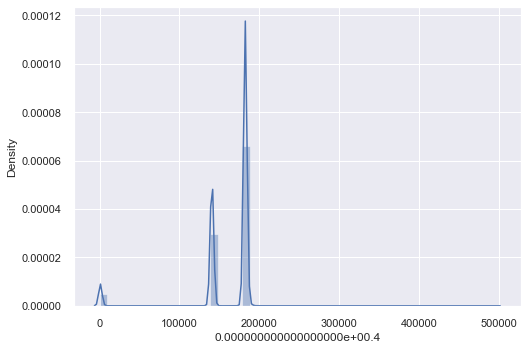

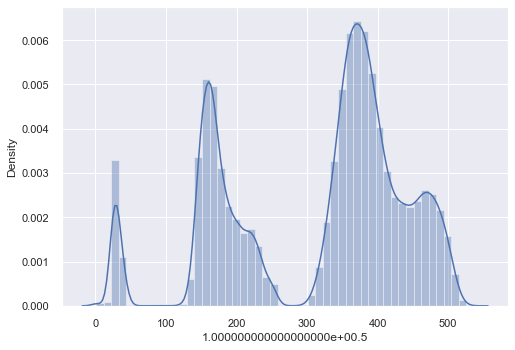

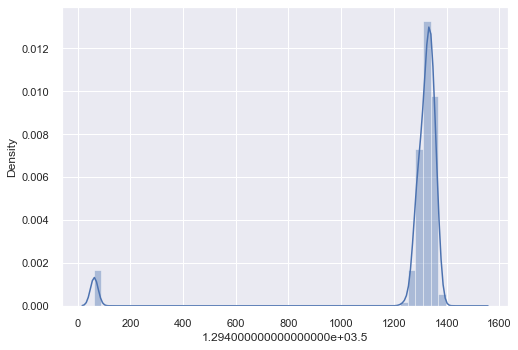

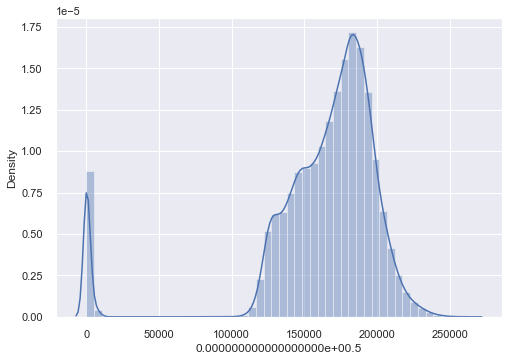

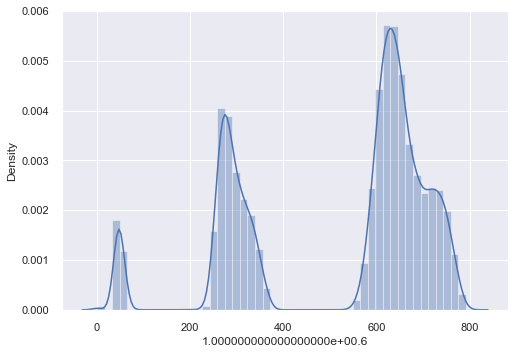

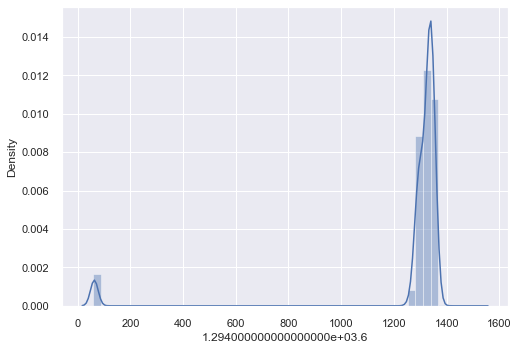

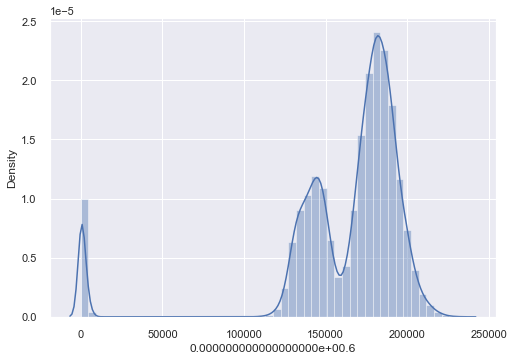

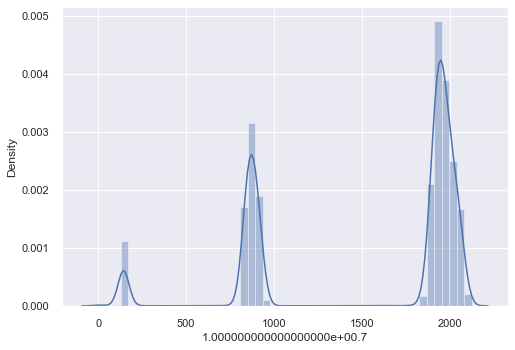

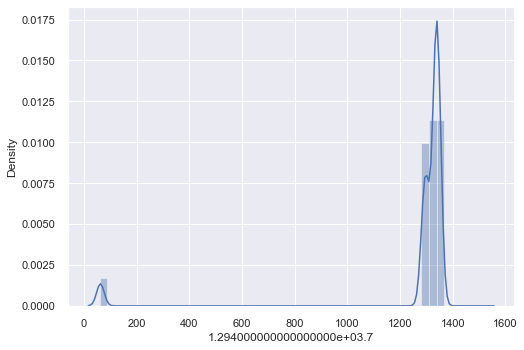

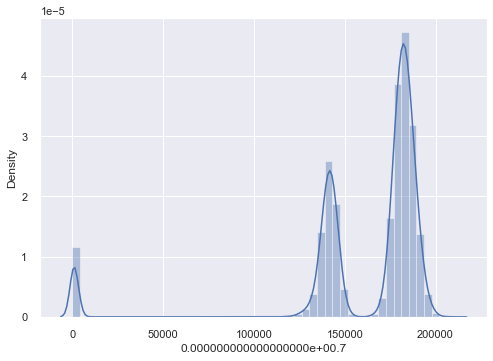

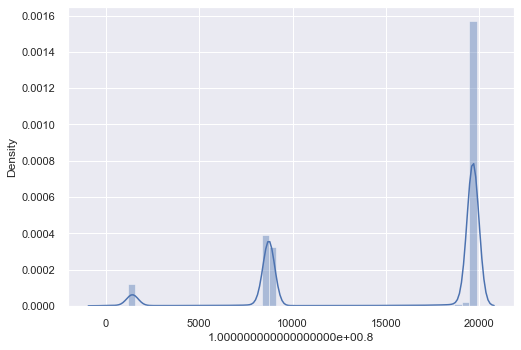

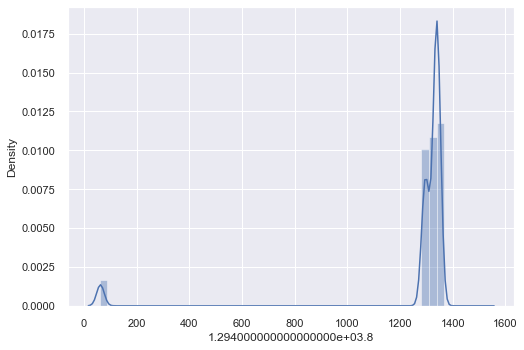

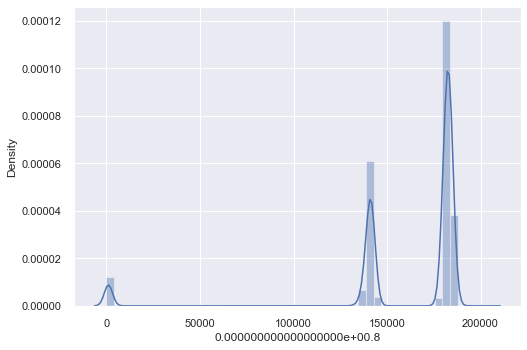

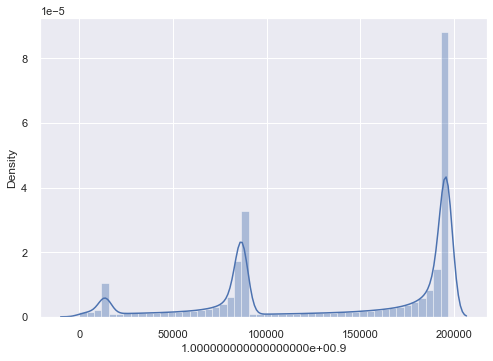

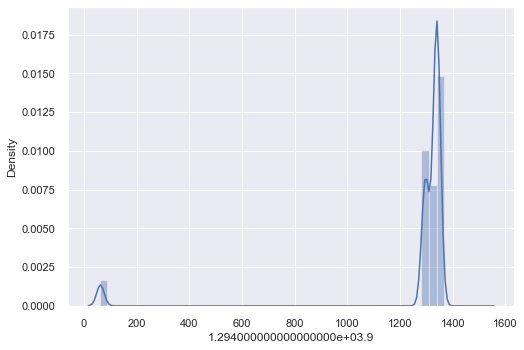

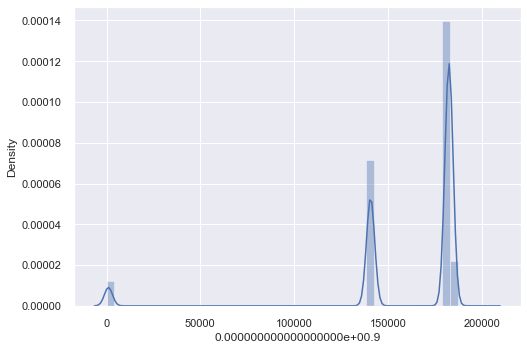

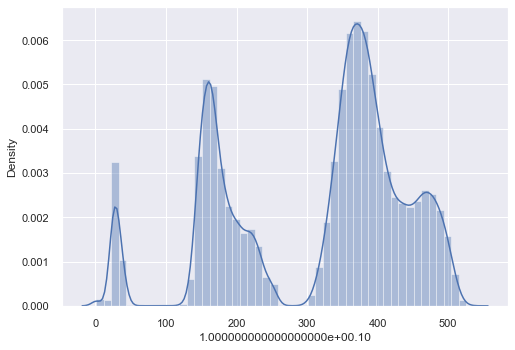

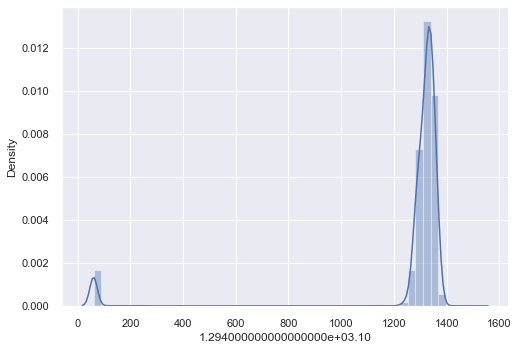

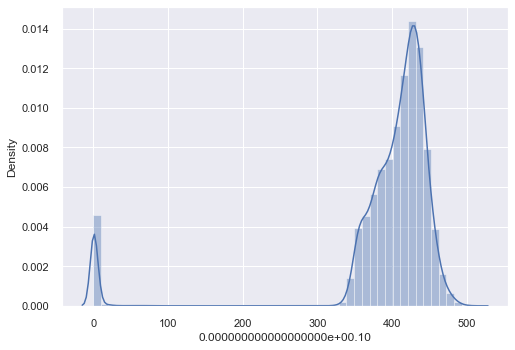

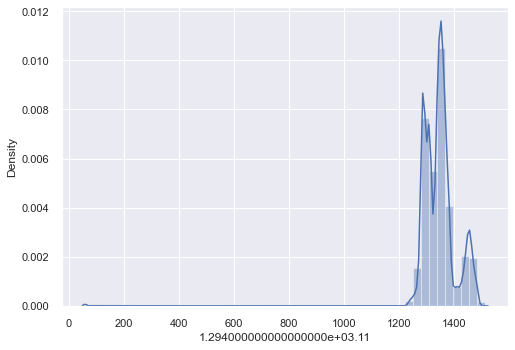

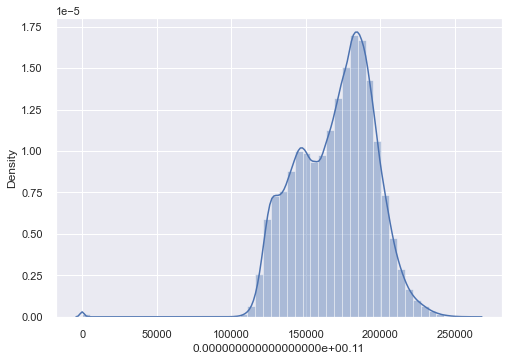

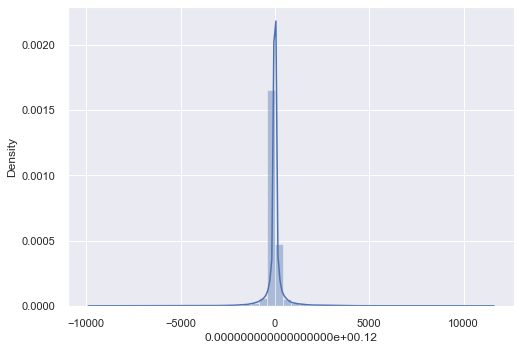

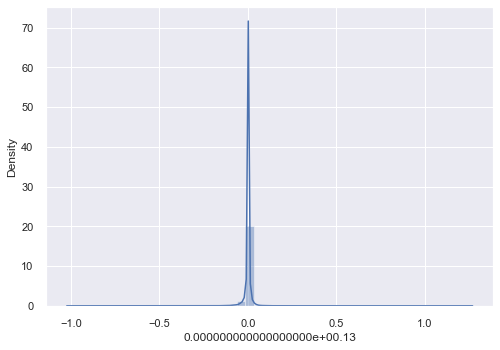

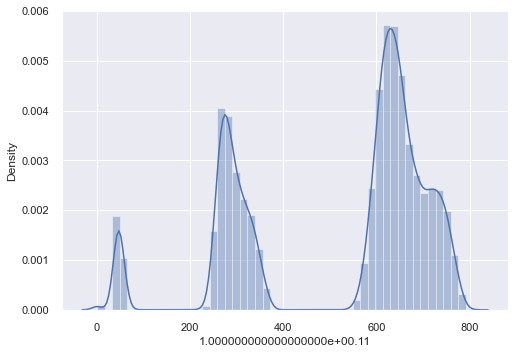

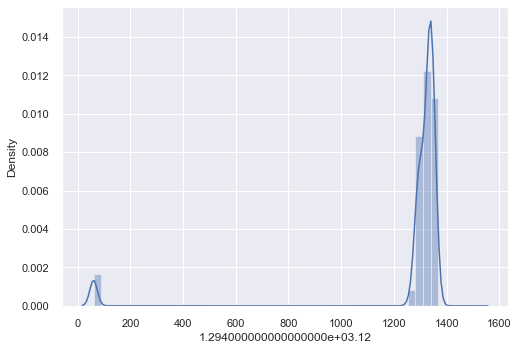

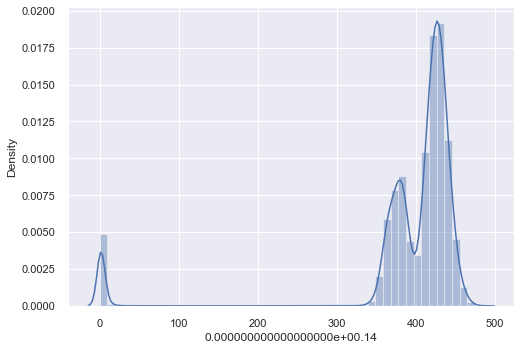

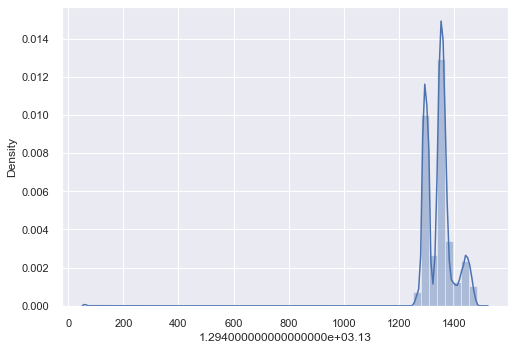

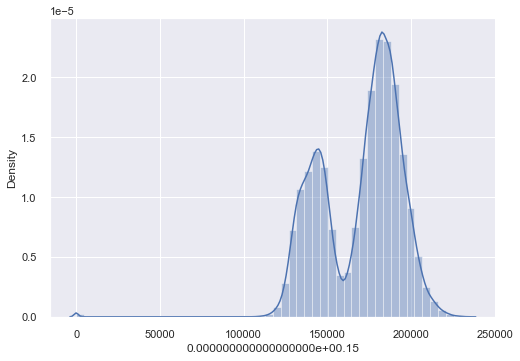

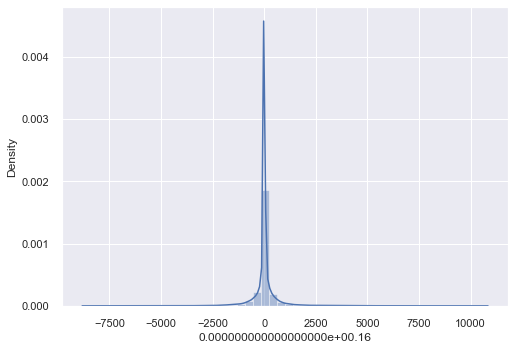

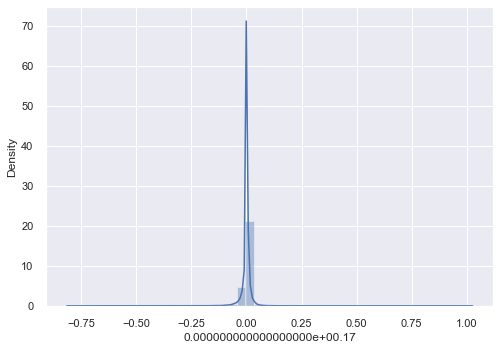

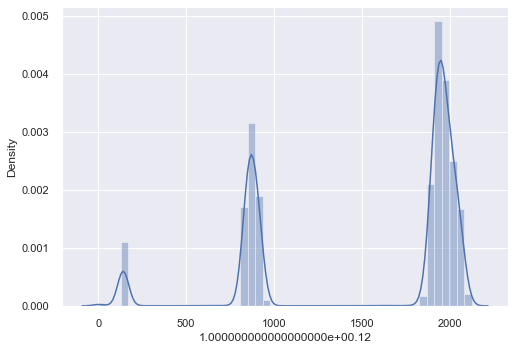

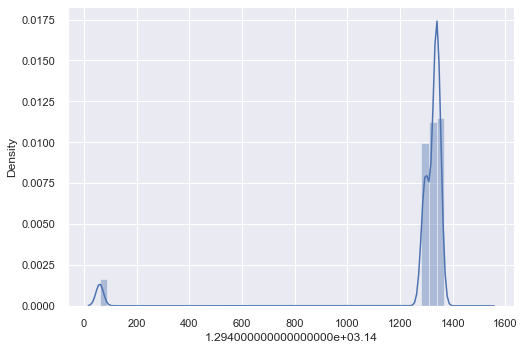

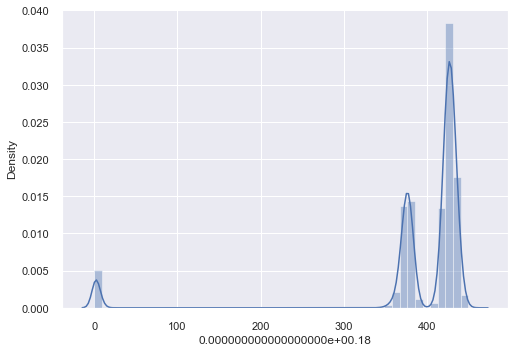

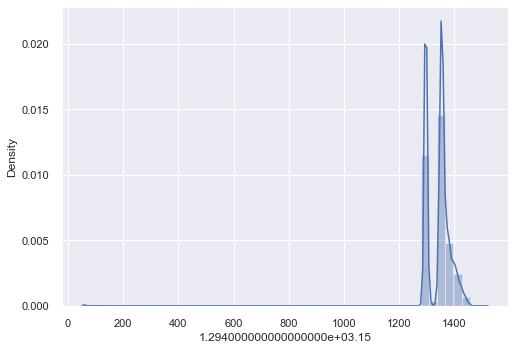

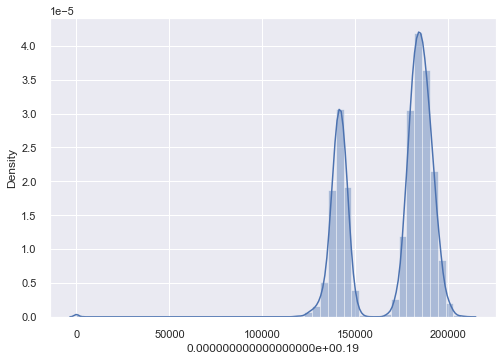

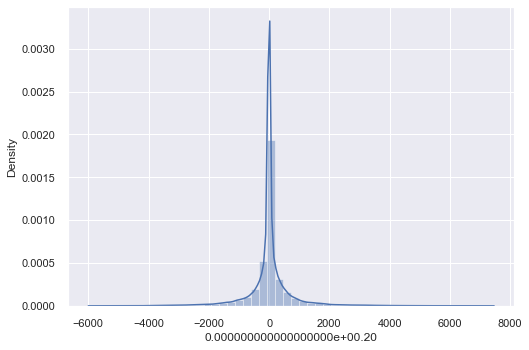

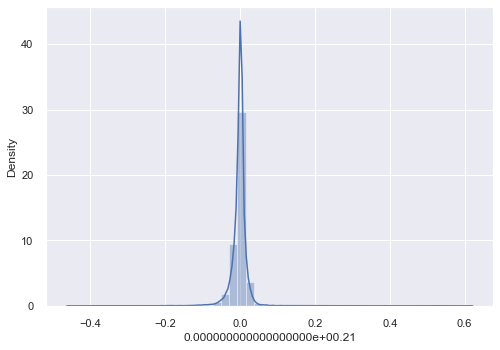

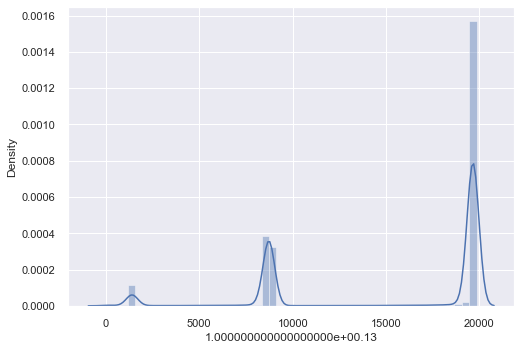

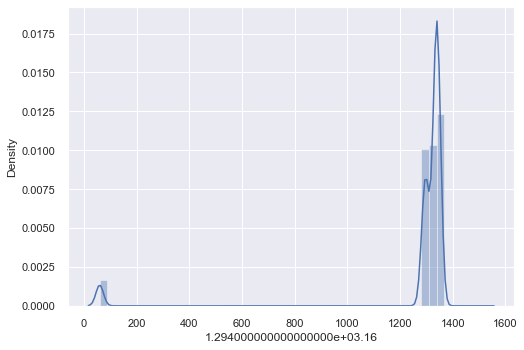

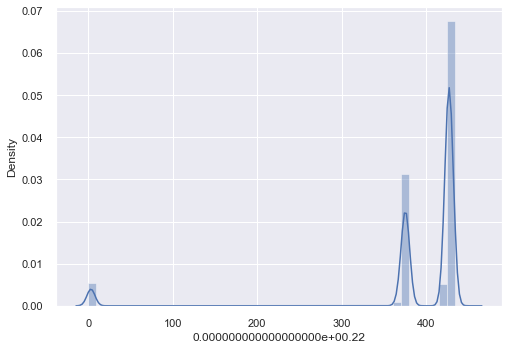

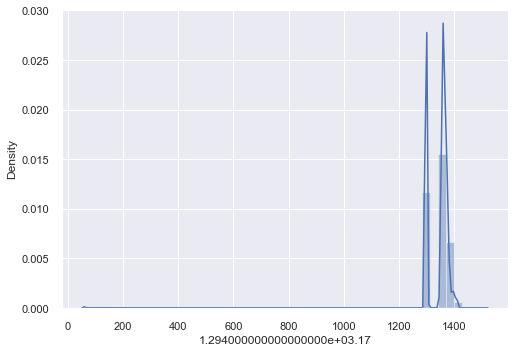

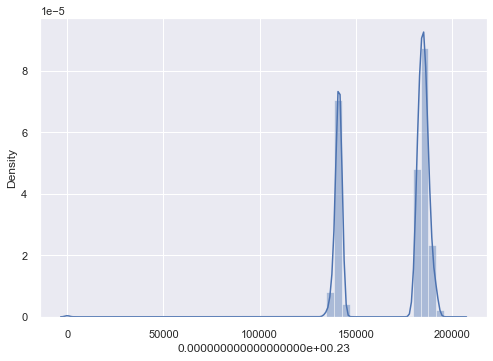

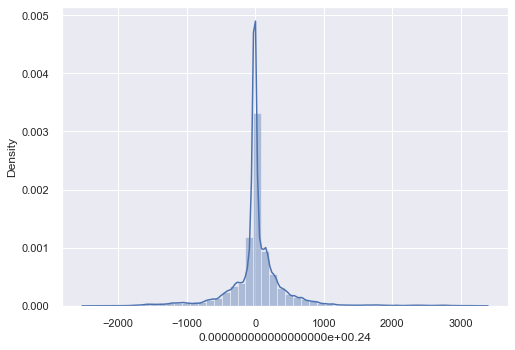

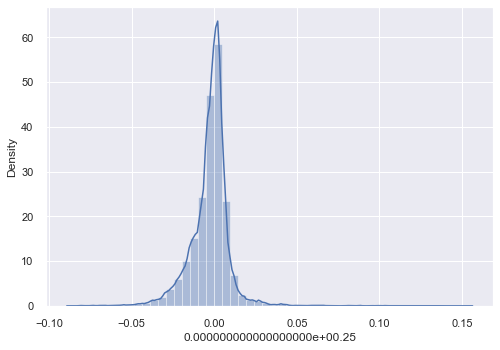

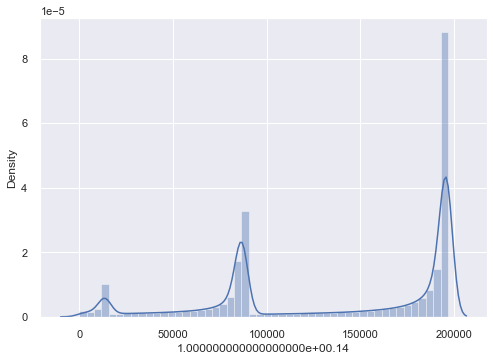

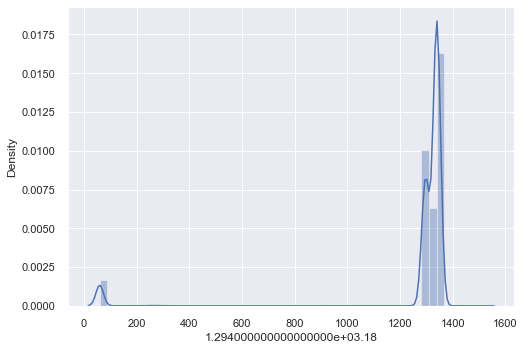

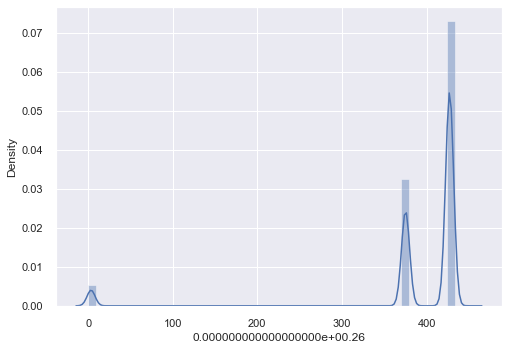

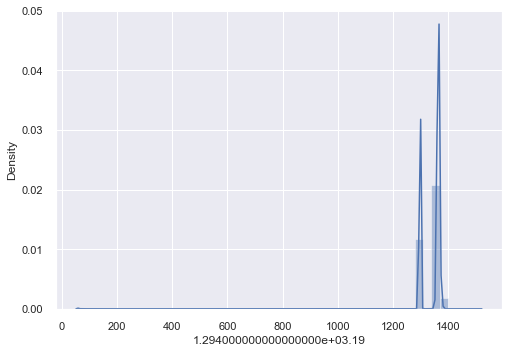

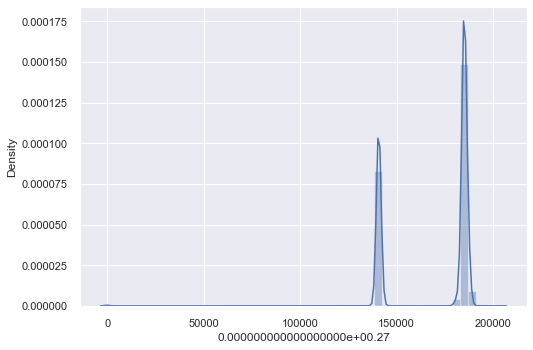

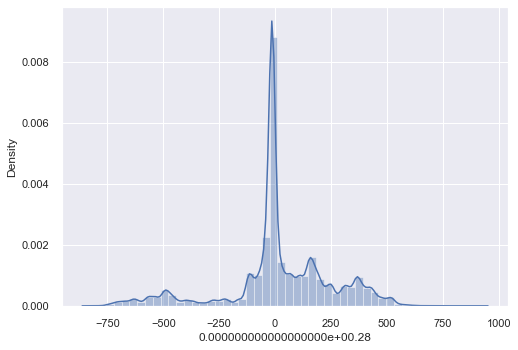

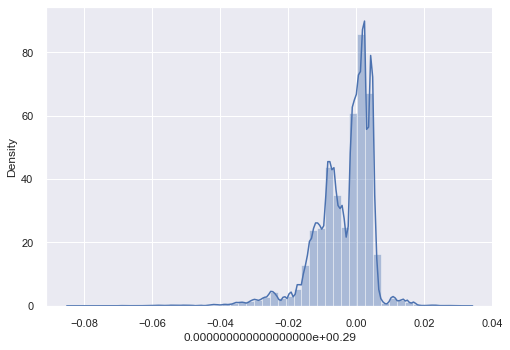

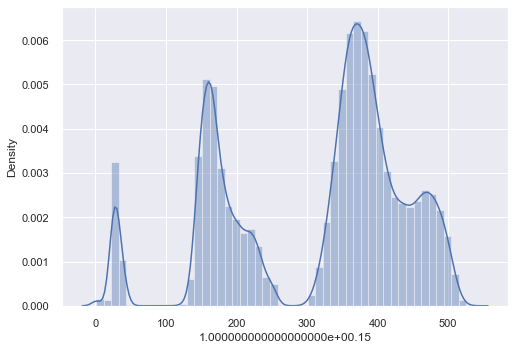

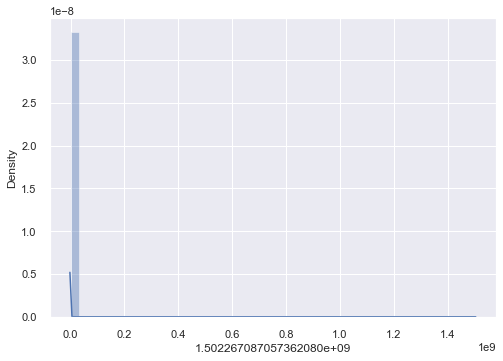

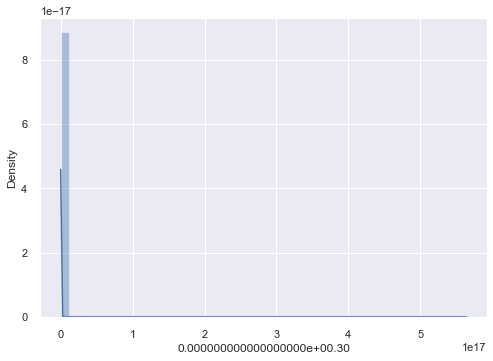

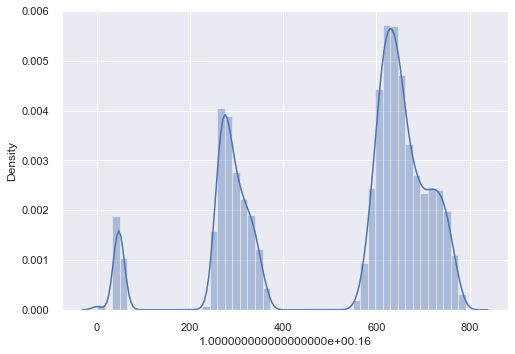

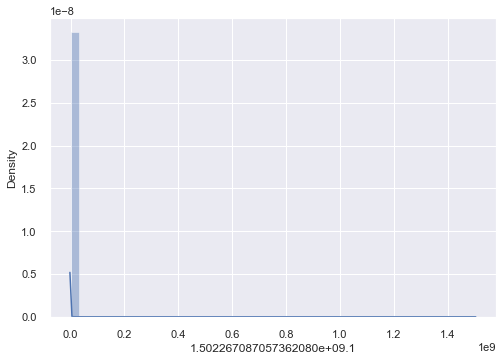

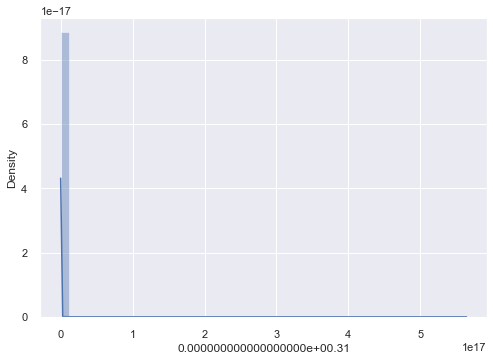

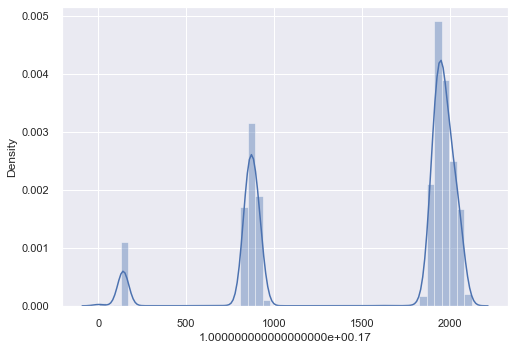

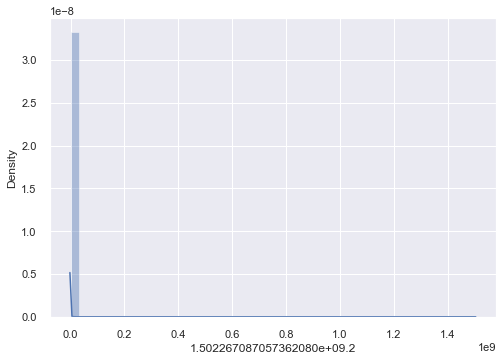

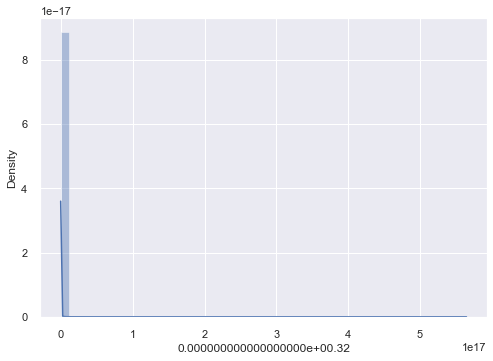

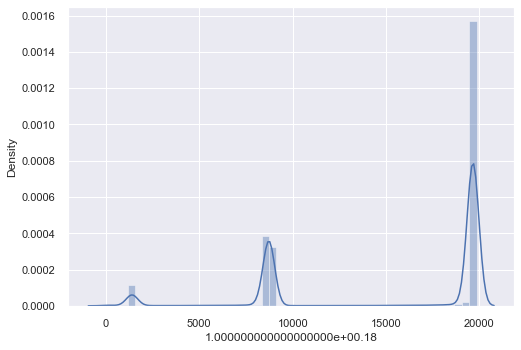

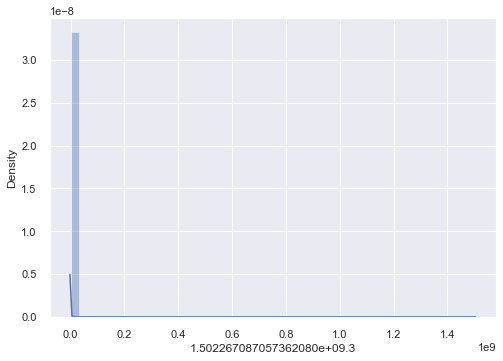

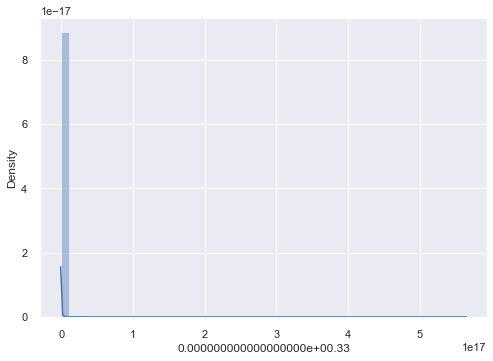

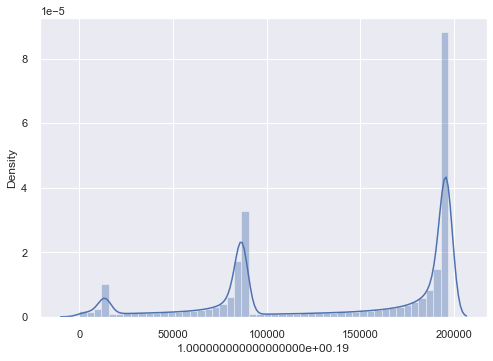

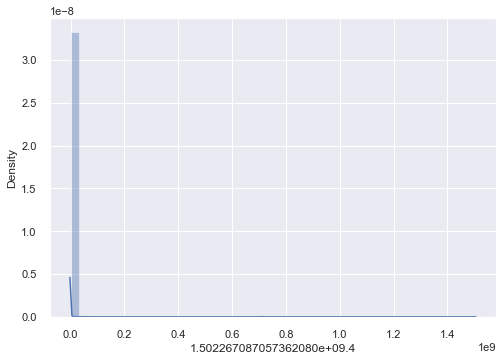

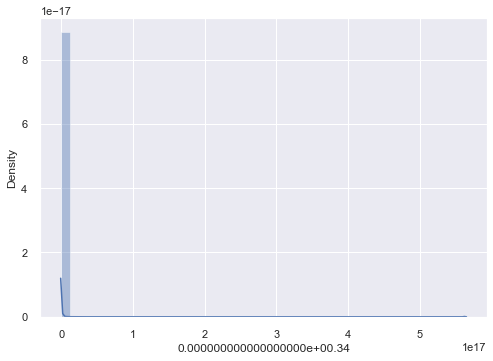

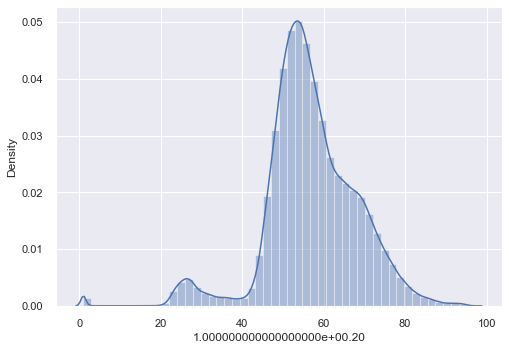

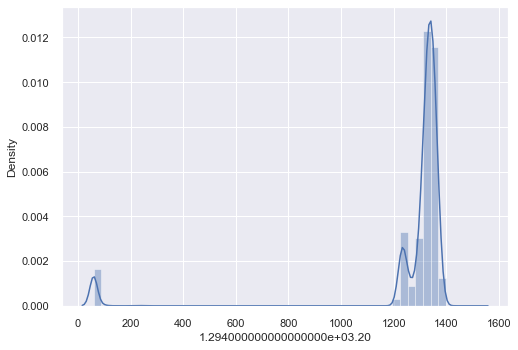

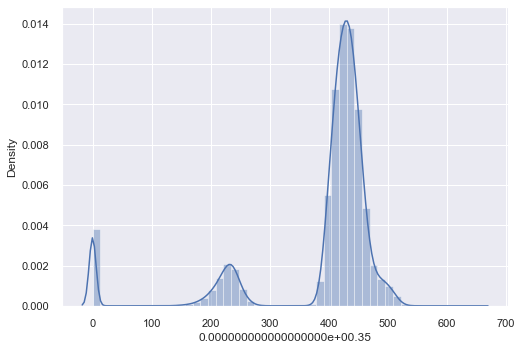

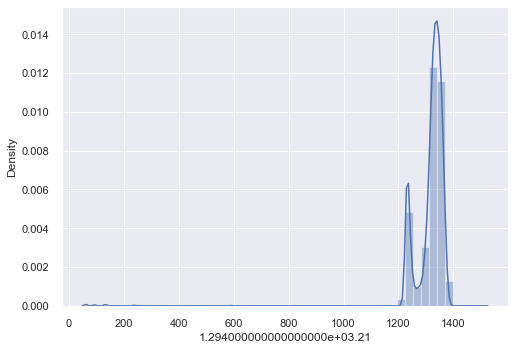

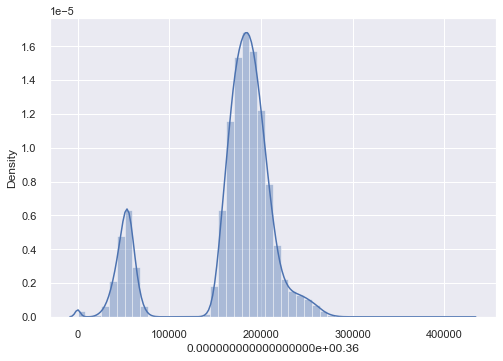

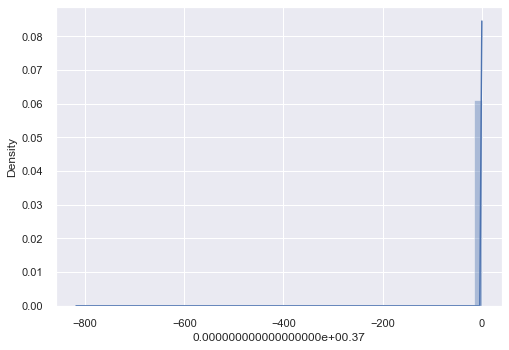

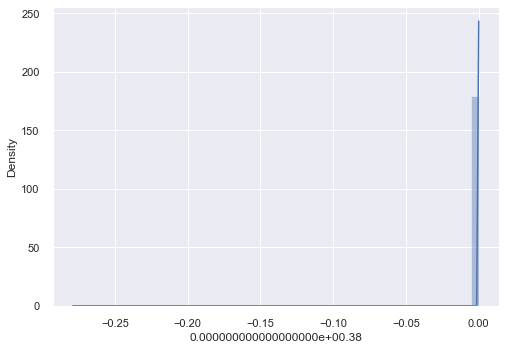

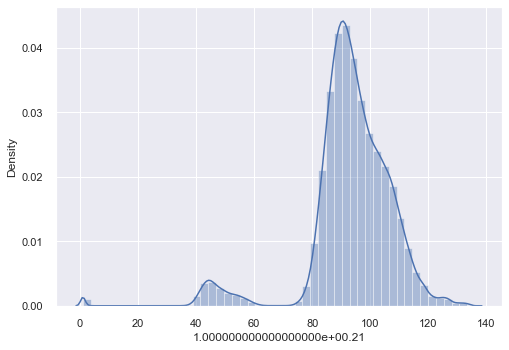

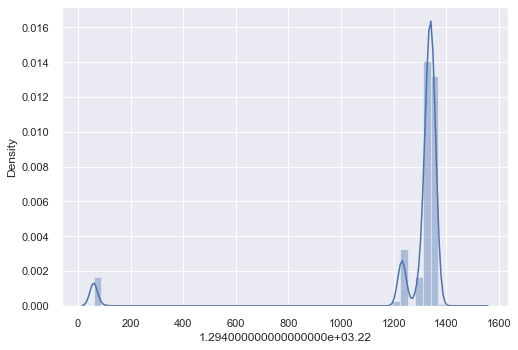

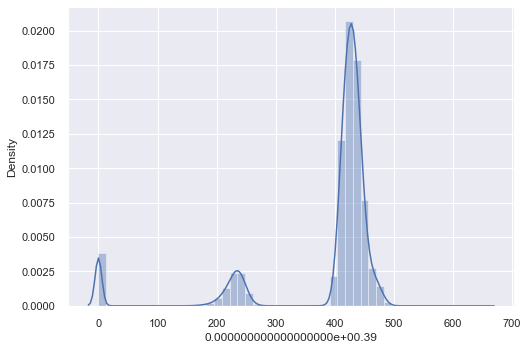

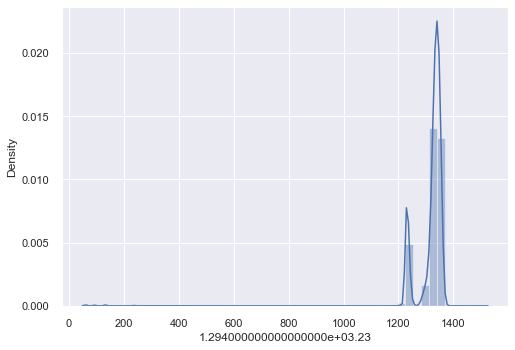

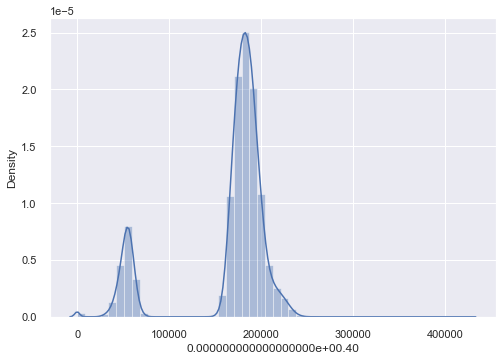

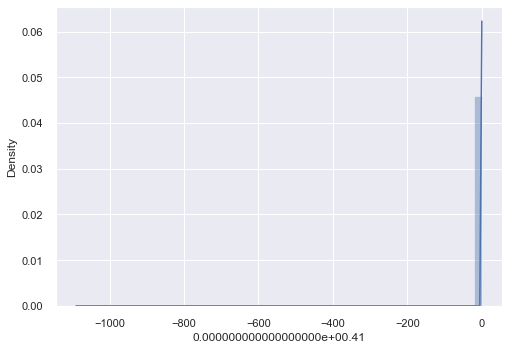

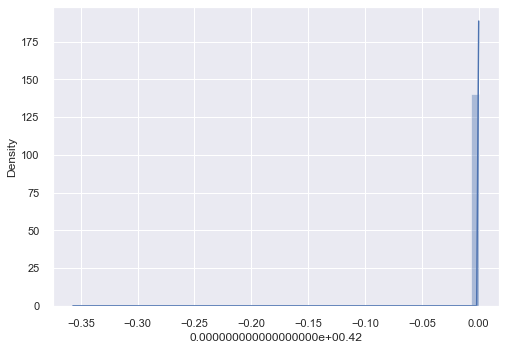

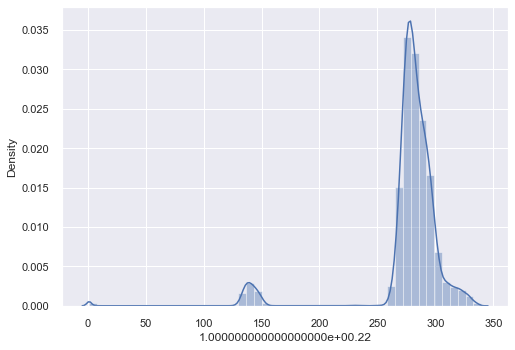

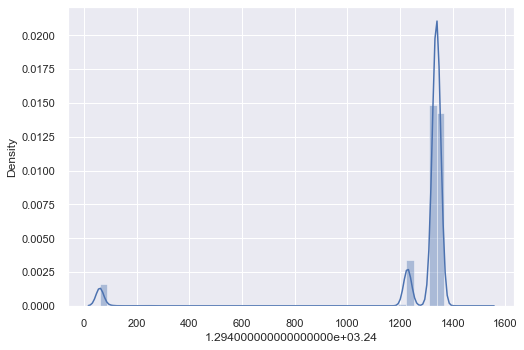

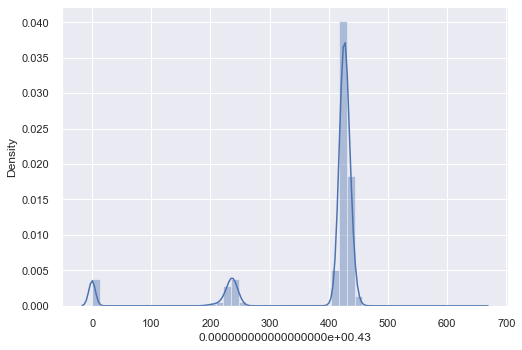

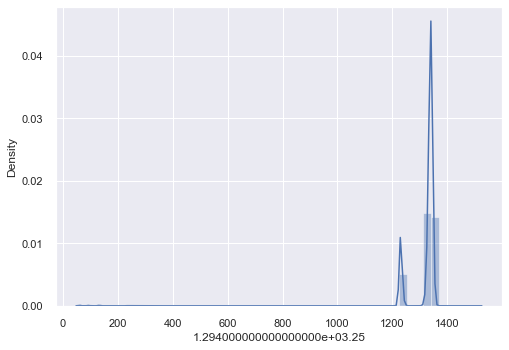

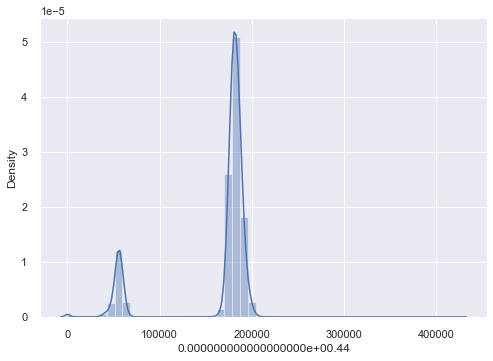

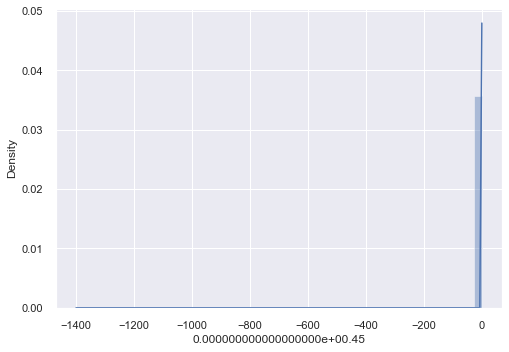

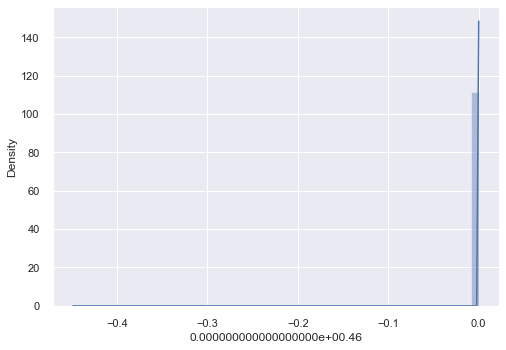

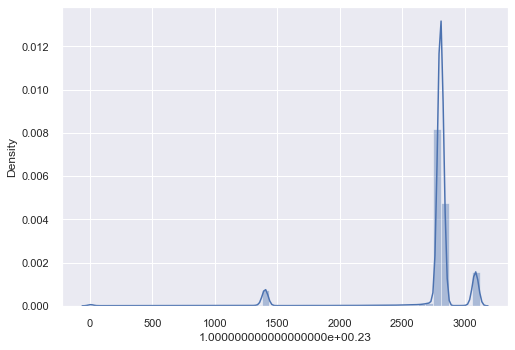

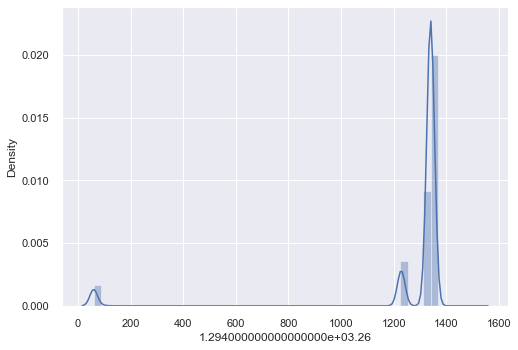

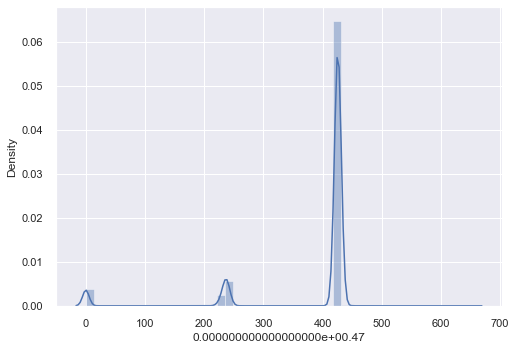

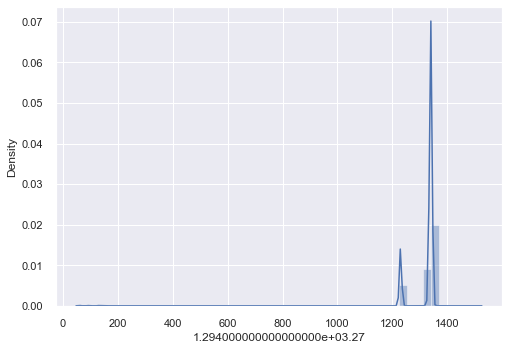

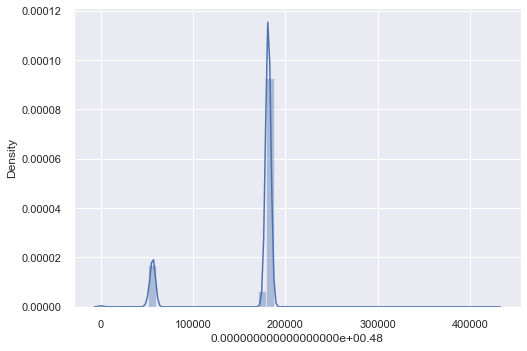

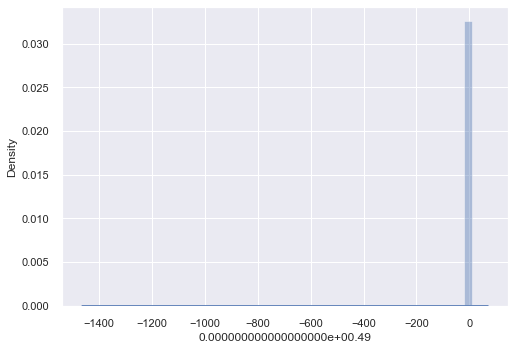

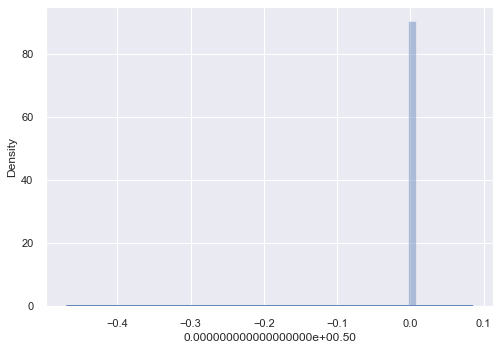

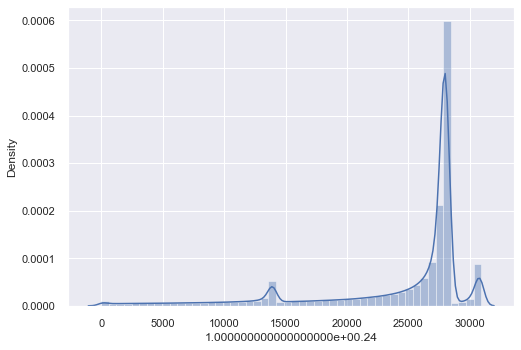

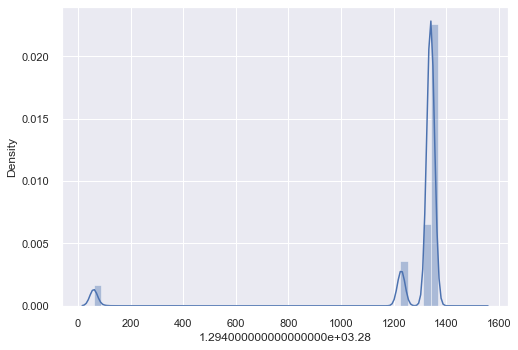

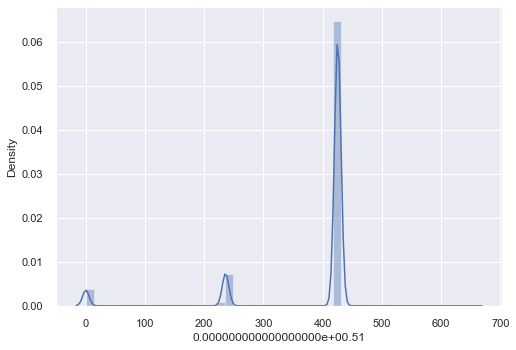

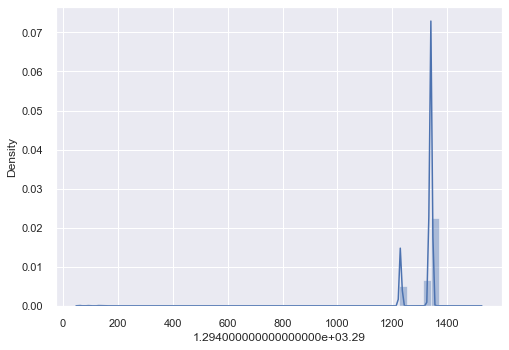

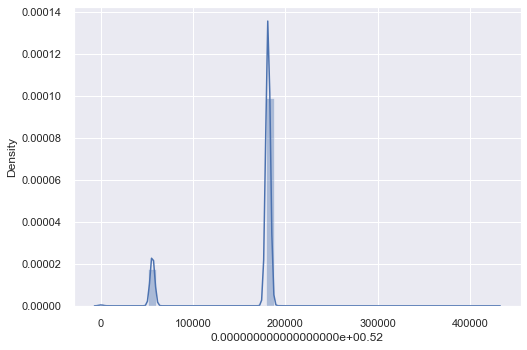

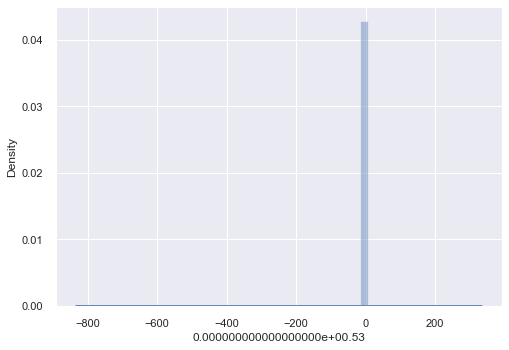

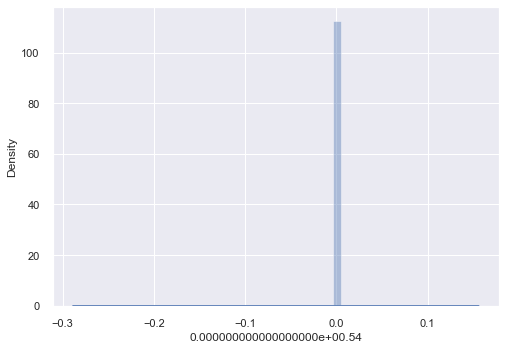

In [20]:
#Display Distribution plots of each of the 115 features from the dataset
fig, axes = plt.subplots(nrows=23, ncols=5)

for i, column in enumerate(ARP_df.columns):
    plt.figure()
    sns.distplot(ARP_df[column])

## Method 1 PCA for dimensional reduction to 2-dimensions

<function matplotlib.pyplot.show(close=None, block=None)>

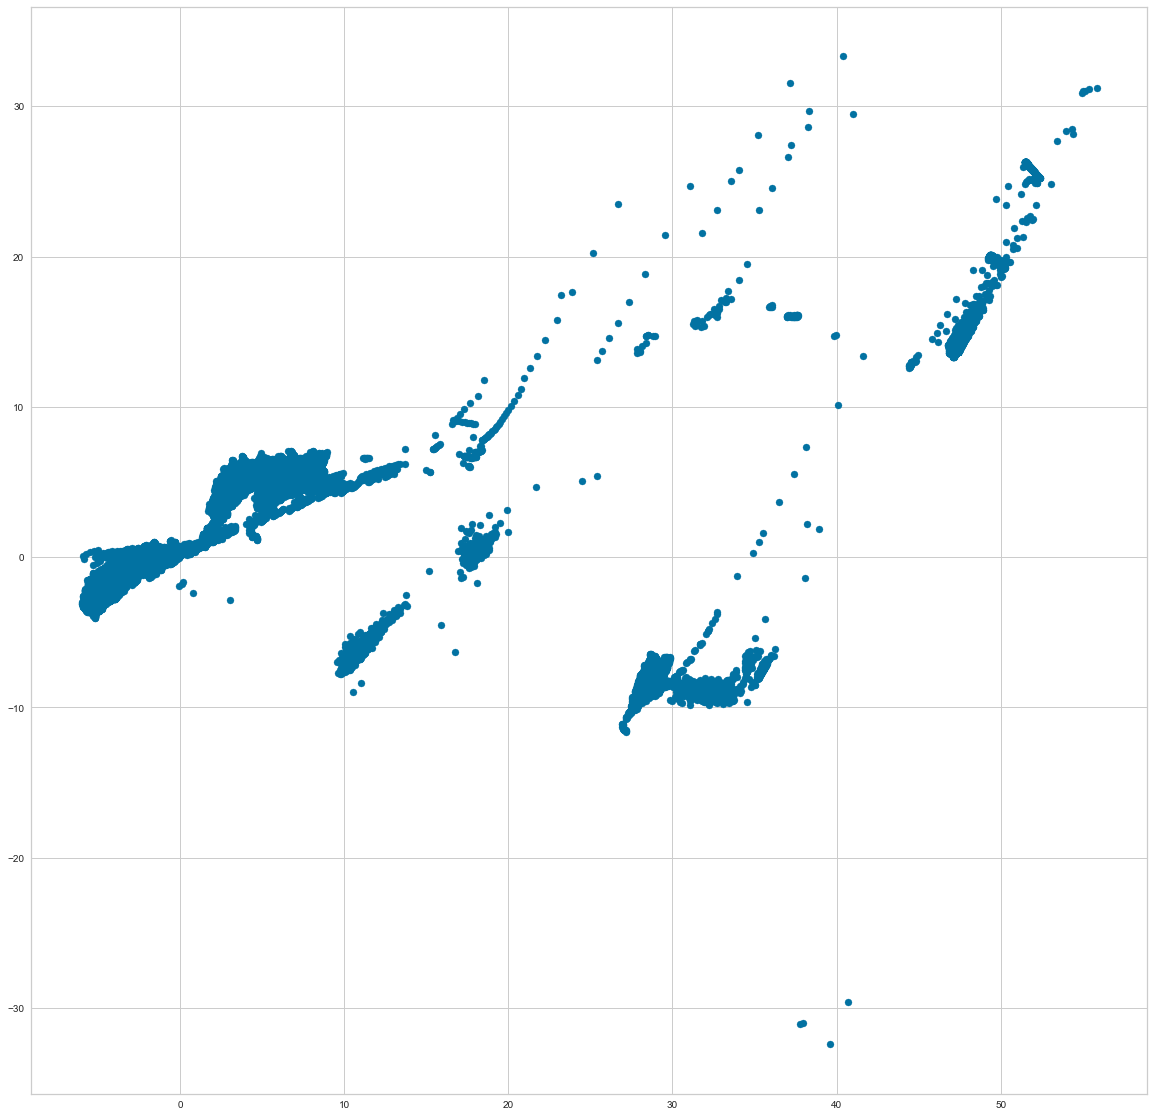

In [3]:
#get all the names of features
features = ARP_df.columns

# Create features datasets
X = ARP_df[features].values

# Standardize the features
X = StandardScaler().fit_transform(X)

# Instantiate PCA
pca = PCA(n_components=2)

# Fit PCA to features
ARP_data_2d_pca = pca.fit_transform(X)

#Visualize the dataset now reduced in 2D
plt.subplots(figsize=(20,20))
plt.scatter(ARP_data_2d_pca[:,0], ARP_data_2d_pca[:,1])
plt.show

In [3]:
#get all the names of features
features = ARP_df.columns

# Create features datasets
X = ARP_df[features].values

# Standardize the features
X = StandardScaler().fit_transform(X)

# Instantiate PCA
pca = PCA(n_components=2)

# Fit PCA to features
ARP_data_2d_pca = pca.fit_transform(X)

### Elbow Method

This method will help determine the number of clusters in our 2D reduced data set (ARP_data_2d_pca). This will help some clustering algorithms that need to specify a number of clusters to be clustered in the dataset. 

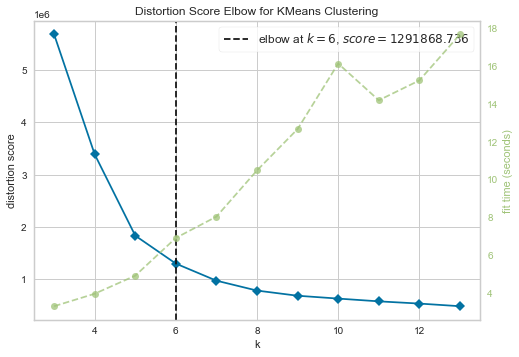

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,14))

visualizer.fit(ARP_data_2d_pca)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

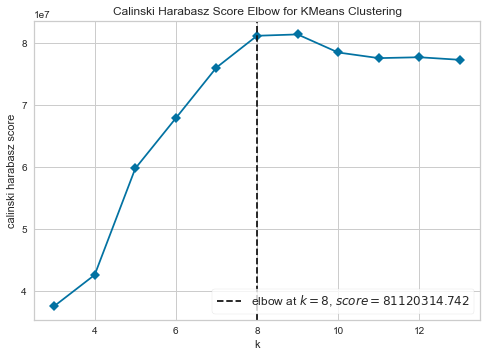

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,14), metric='calinski_harabasz', timings=False
)

visualizer.fit(ARP_data_2d_pca)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

### Testing various clustering algorithms

In [5]:
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0} #plotting specifications

#This function will be used to run different typs of clustering algorithms
def plot_clusters(data, algorithm, args, kwds):
    
    start_time = time.time()                             #start time
    labels = algorithm(*args, **kwds).fit_predict(data)  #fit clustering algorithm
    end_time = time.time()                               #end time
    
    #plotting data with clustering algorimthm 
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.subplots(figsize=(20,20))
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-5, 30, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

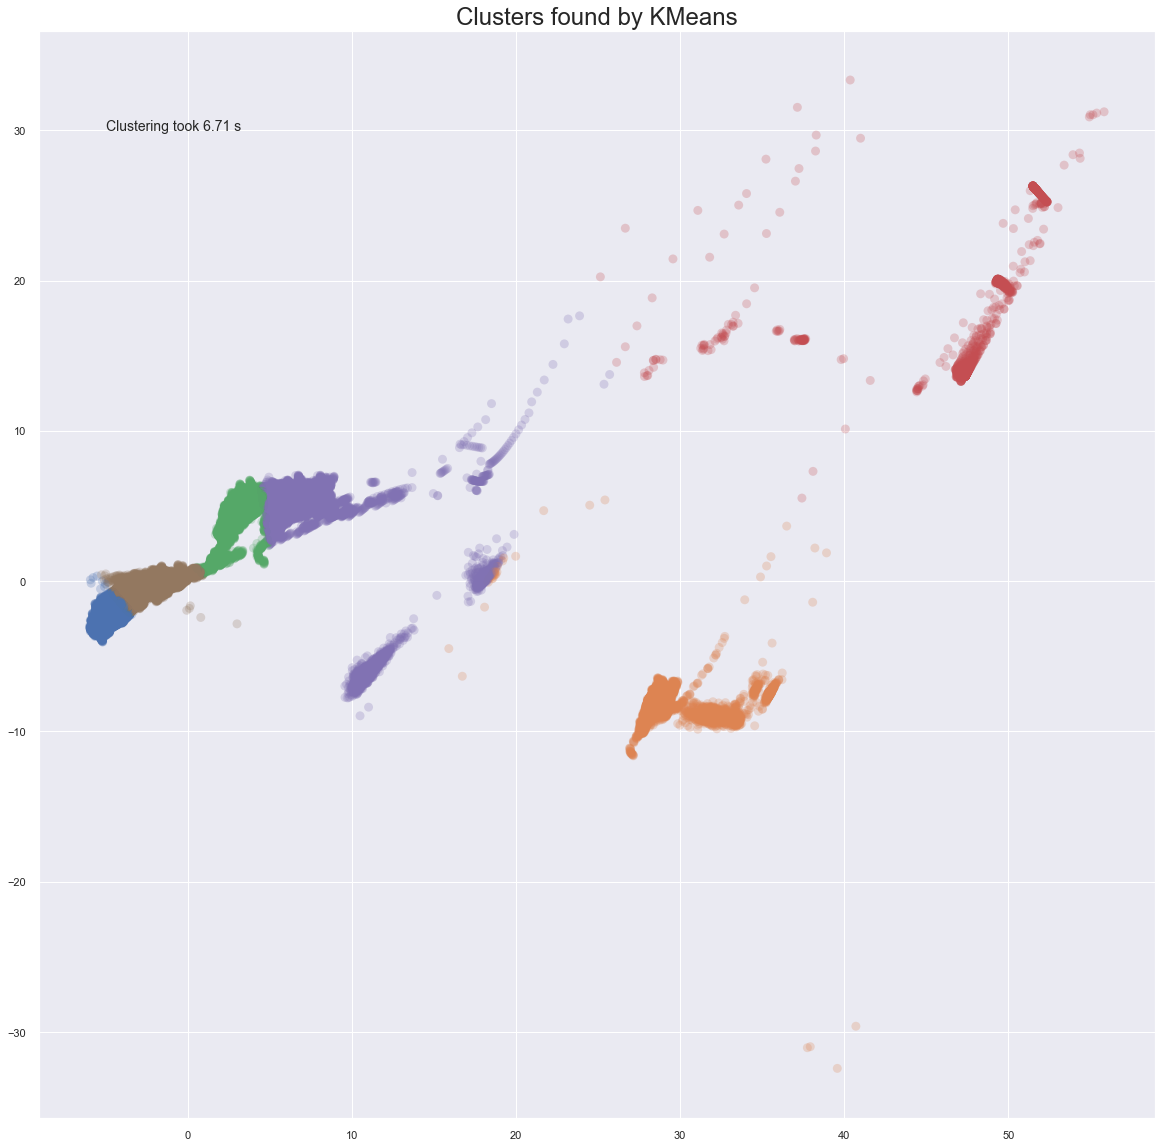

In [36]:
#Running Kmeans Algorithm, 8 clusters
plot_clusters(ARP_data_2d_pca, cluster.KMeans, (), {'n_clusters':6})

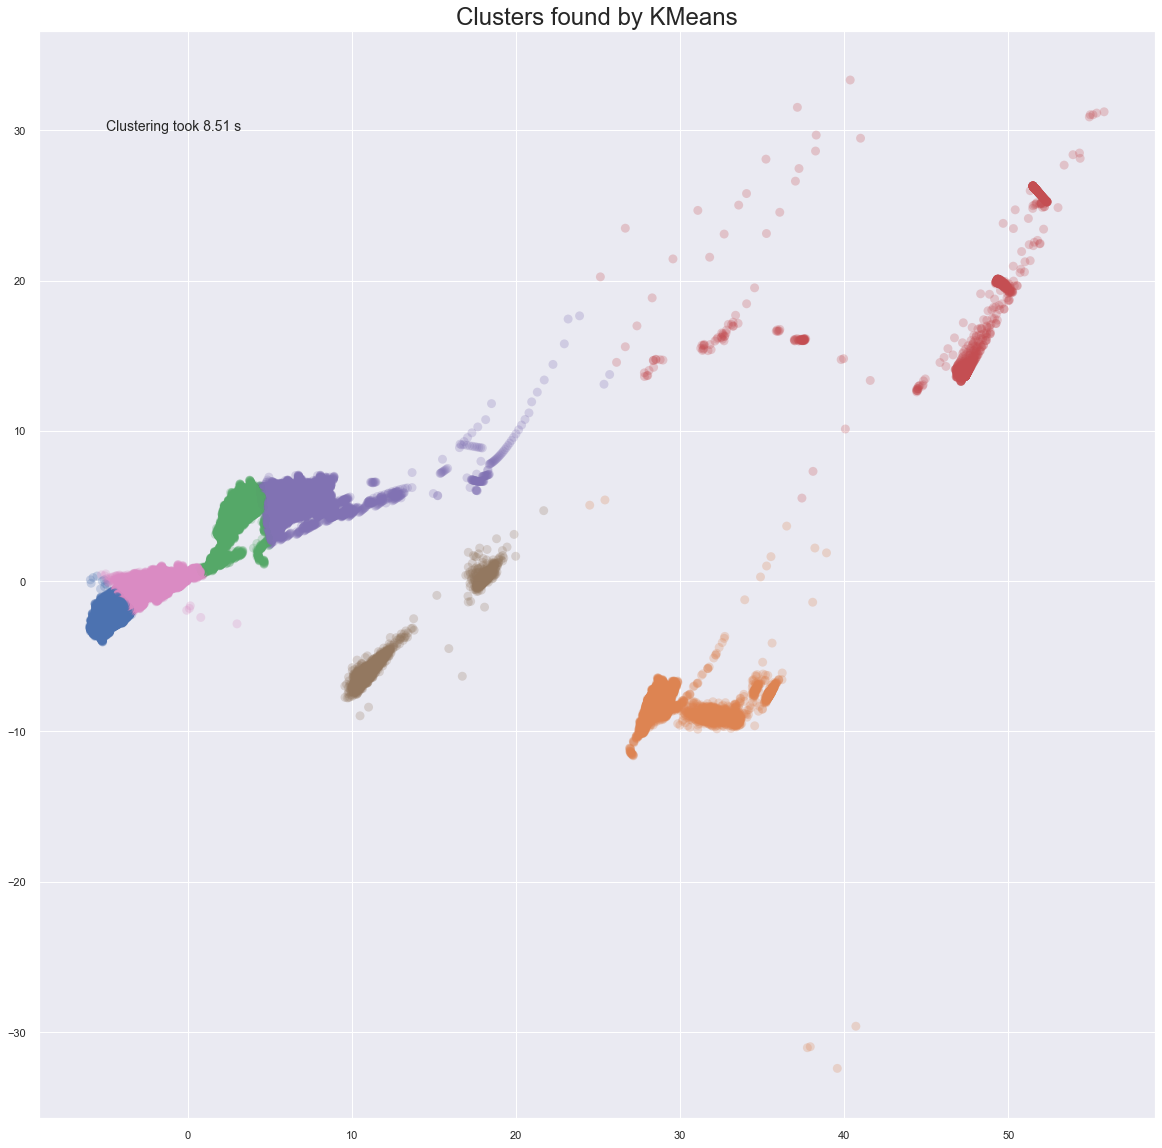

In [10]:
#Running Kmeans Algorithm, 8 clusters
plot_clusters(ARP_data_2d_pca, cluster.KMeans, (), {'n_clusters':7})

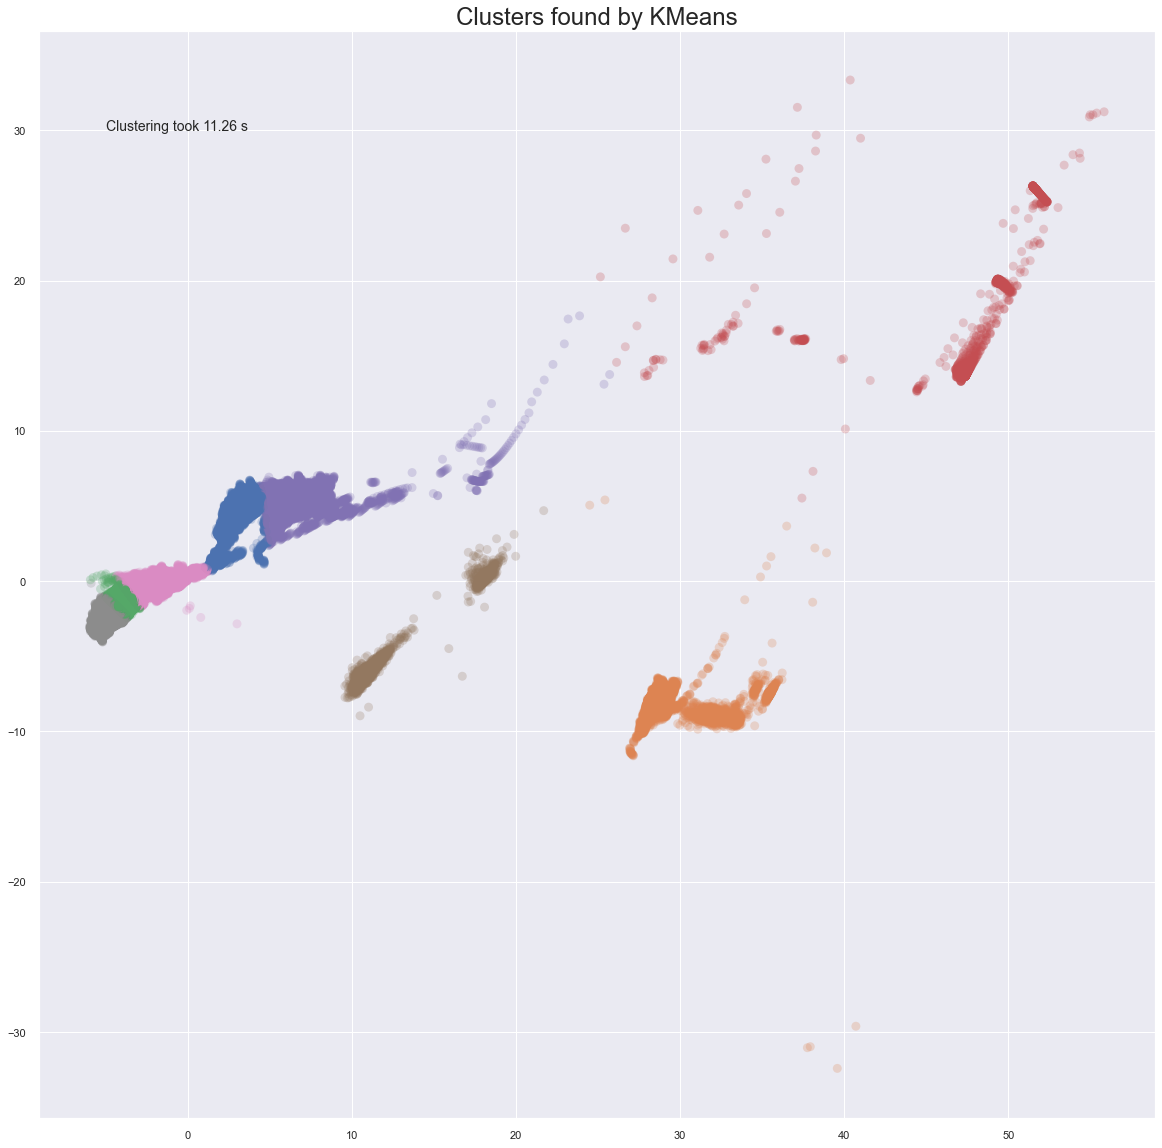

In [11]:
#Running Kmeans Algorithm, 8 clusters
plot_clusters(ARP_data_2d_pca, cluster.KMeans, (), {'n_clusters':8})

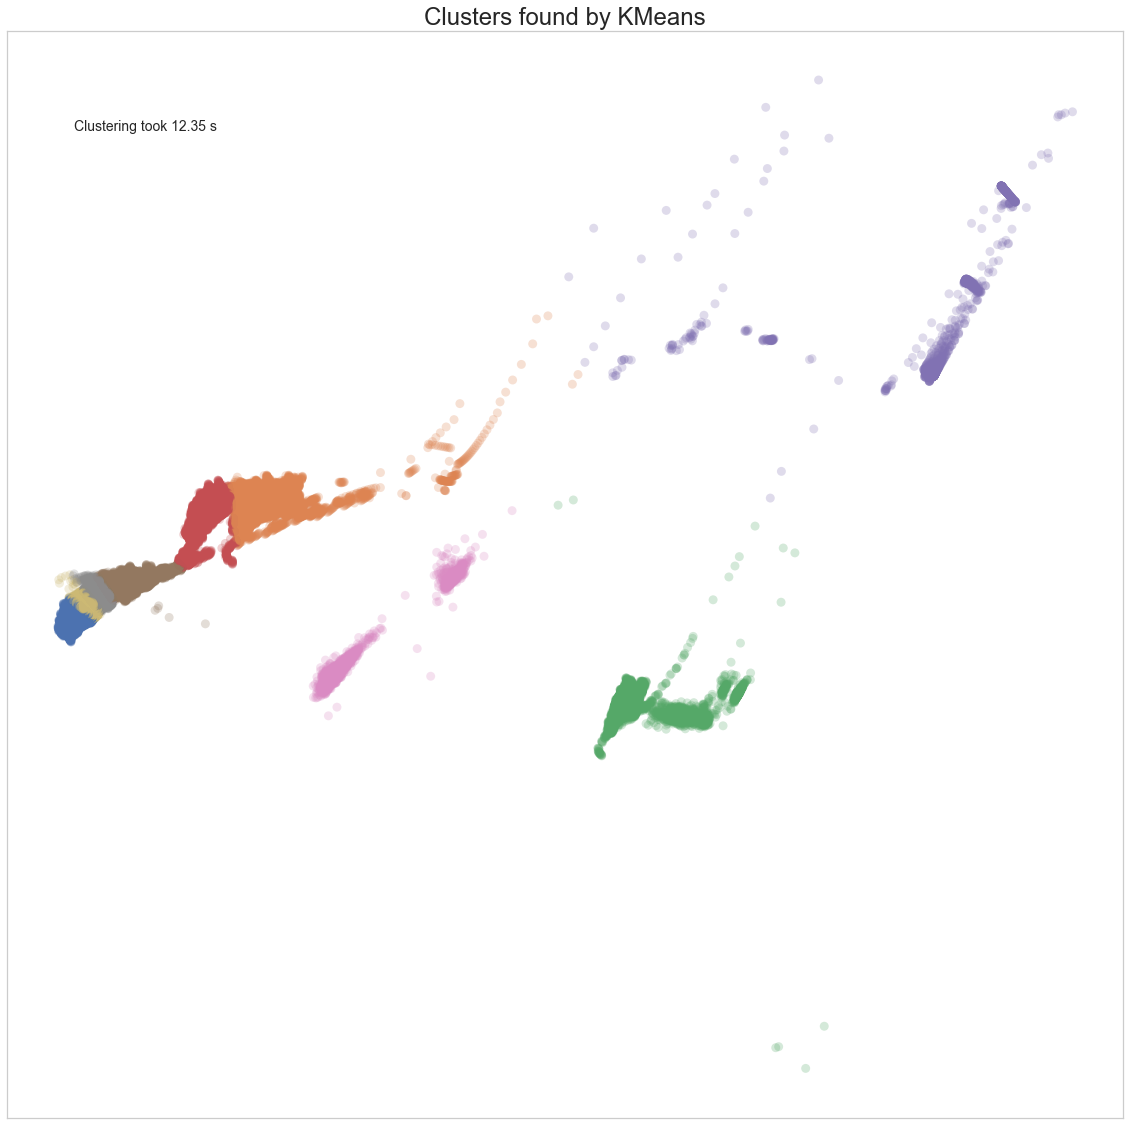

In [34]:
#Running Kmeans Algorithm, 9 clusters
plot_clusters(ARP_data_2d_pca, cluster.KMeans, (), {'n_clusters':9})

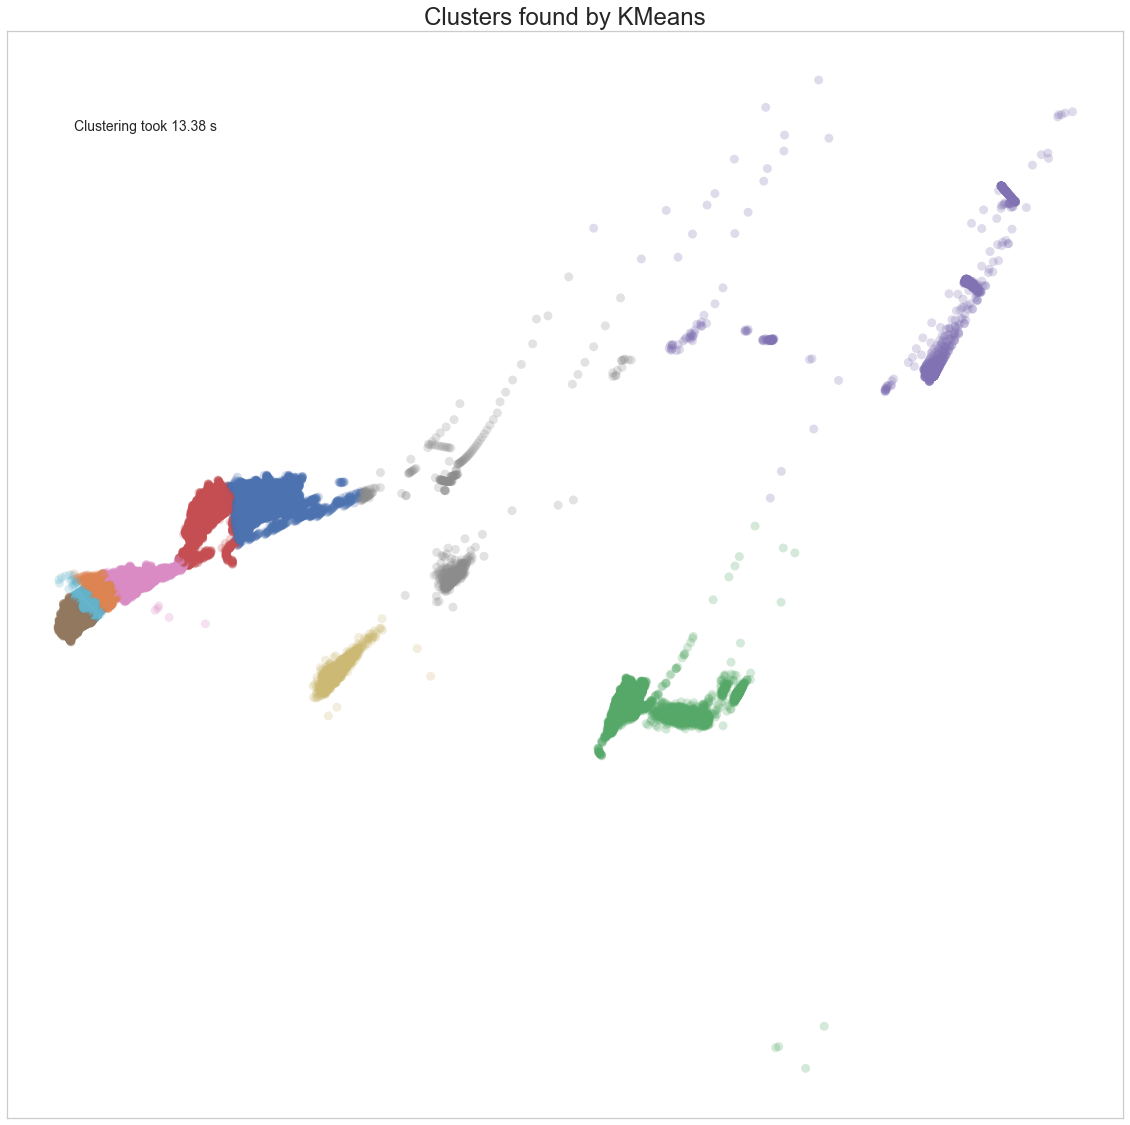

In [35]:
#Running Kmeans Algorithm, 10 clusters
plot_clusters(ARP_data_2d_pca, cluster.KMeans, (), {'n_clusters':10})

In [ ]:
#COULD NOT RUN due too much memory usage for my laptop
plot_clusters(ARP_data_2d_pca, cluster.DBSCAN, (), {'eps':0.5})

## Method 2: PCA 2D to Gaussian Mixture clustering algorithm

Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.

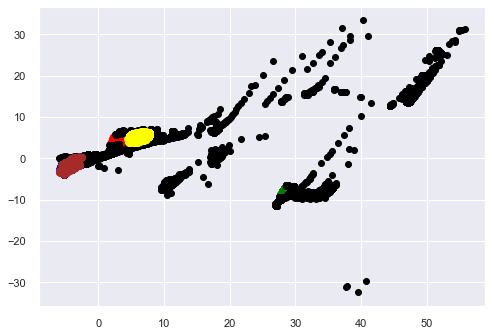

In [16]:
gmm = GaussianMixture(n_components=6)
gmm.fit(ARP_data_2d_pca)

#predictions from gmm
labels = gmm.predict(ARP_data_2d_pca)
frame = pd.DataFrame(ARP_data_2d_pca)
frame['cluster'] = labels
frame.columns = ['PCA-1', 'PCA-2', 'cluster']

color=['blue','green','red', 'black', 'yellow', 'brown']
for k in range(0,6):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PCA-1"],data["PCA-2"],c=color[k])
plt.show()

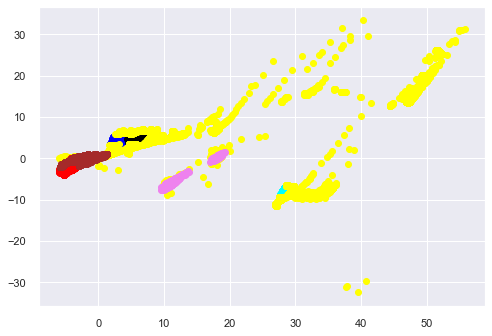

In [17]:
gmm = GaussianMixture(n_components=8)
gmm.fit(ARP_data_2d_pca)

#predictions from gmm
labels = gmm.predict(ARP_data_2d_pca)
frame = pd.DataFrame(ARP_data_2d_pca)
frame['cluster'] = labels
frame.columns = ['PCA-1', 'PCA-2', 'cluster']

color=['blue','green','cyan', 'black', 'yellow', 'violet', 'red', 'brown',]
for k in range(0,8):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["PCA-1"],data["PCA-2"],c=color[k])
plt.show()

## Method 3: PCA to 3D then Kmeans clustering

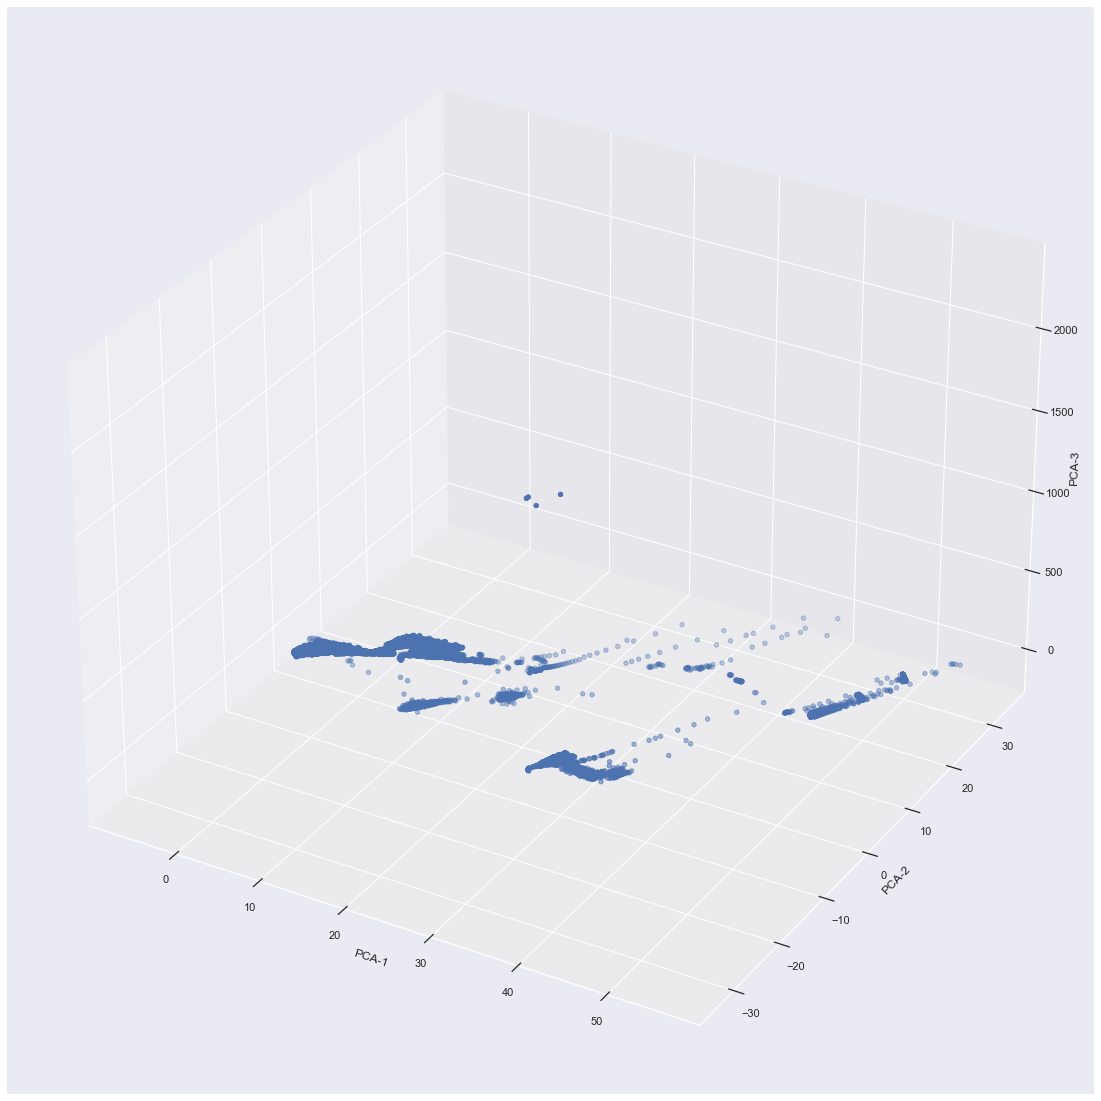

In [4]:
#get all the names of features
features = ARP_df.columns

# Create features datasets
X = ARP_df[features].values

# Standardize the features
X = StandardScaler().fit_transform(X)

# Instantiate PCA
pca = PCA(n_components=3)

# Fit PCA to features
ARP_data_3d_pca = pca.fit_transform(X)

#Visualize the dataset now reduced in 3D
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection = '3d')

x = ARP_data_3d_pca[:,0]
y = ARP_data_3d_pca[:,1]
z = ARP_data_3d_pca[:,2]

ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")

ax.scatter(x, y, z)

plt.show()

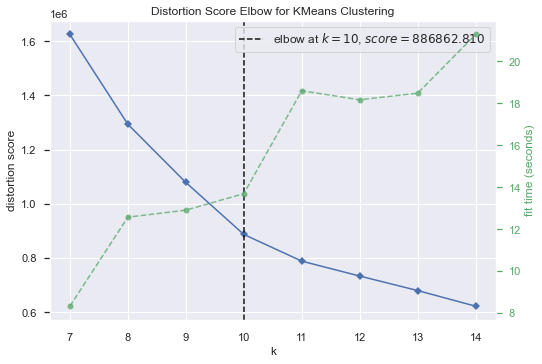

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(7,15))

visualizer.fit(ARP_data_3d_pca)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

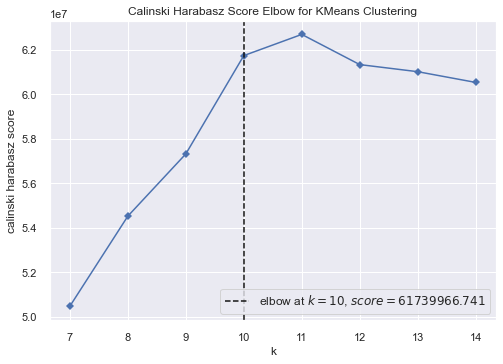

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [9]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(7,15), metric='calinski_harabasz', timings=False
)

visualizer.fit(ARP_data_3d_pca)        # Fit the data to the visualizer
visualizer.show()                      # Finalize and render the figure

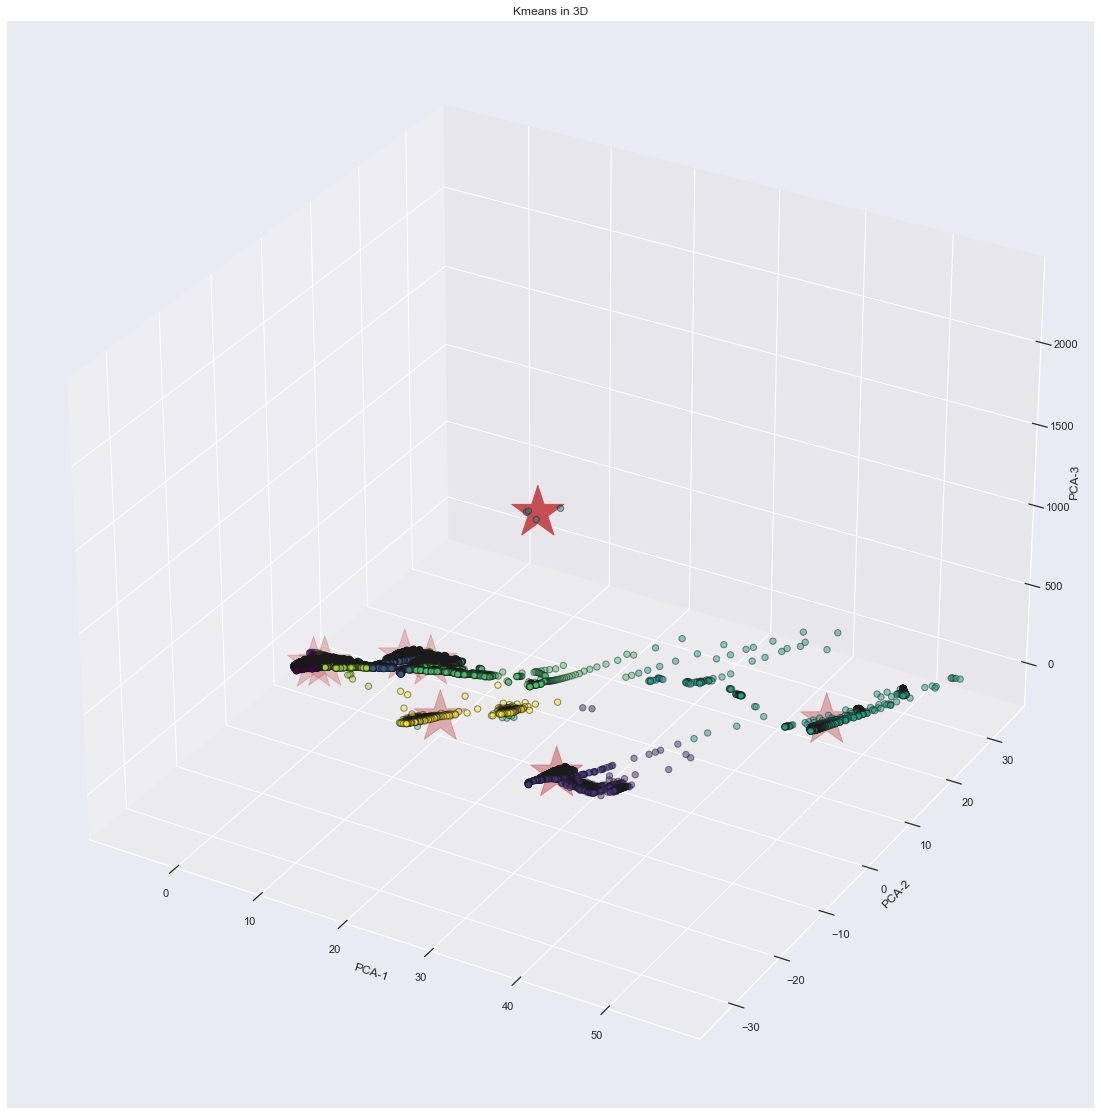

In [30]:
#Kmeans in 8 clusters

kmeans_PCA = KMeans(n_clusters=8)

y_kmeans_PCA = kmeans_PCA.fit_predict(ARP_data_3d_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ARP_data_3d_pca[:,0], ARP_data_3d_pca[:,1], ARP_data_3d_pca[:,2], c=y_kmeans_PCA, cmap='viridis', edgecolor='k', s=40, alpha = 0.5)


ax.set_title("Kmeans in 3D")
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 3000, c = 'r', marker='*', label = 'Centroid')   

plt.show()

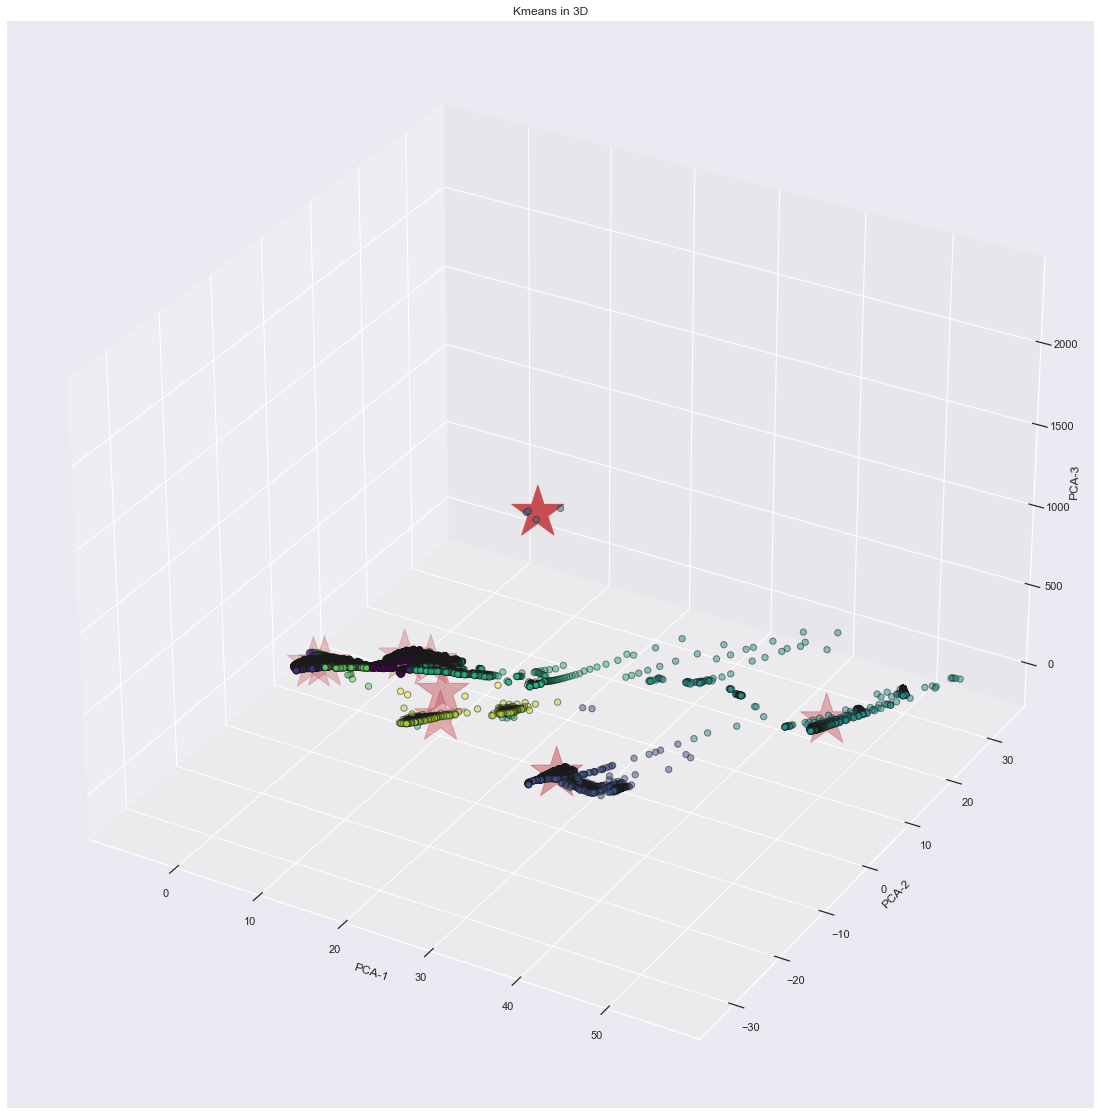

In [11]:
#Kmeans in 9 clusters

kmeans_PCA = KMeans(n_clusters=9)

y_kmeans_PCA = kmeans_PCA.fit_predict(ARP_data_3d_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ARP_data_3d_pca[:,0], ARP_data_3d_pca[:,1], ARP_data_3d_pca[:,2], c=y_kmeans_PCA, cmap='viridis', edgecolor='k', s=40, alpha = 0.5)


ax.set_title("Kmeans in 3D")
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 3000, c = 'r', marker='*', label = 'Centroid')
    

plt.show()

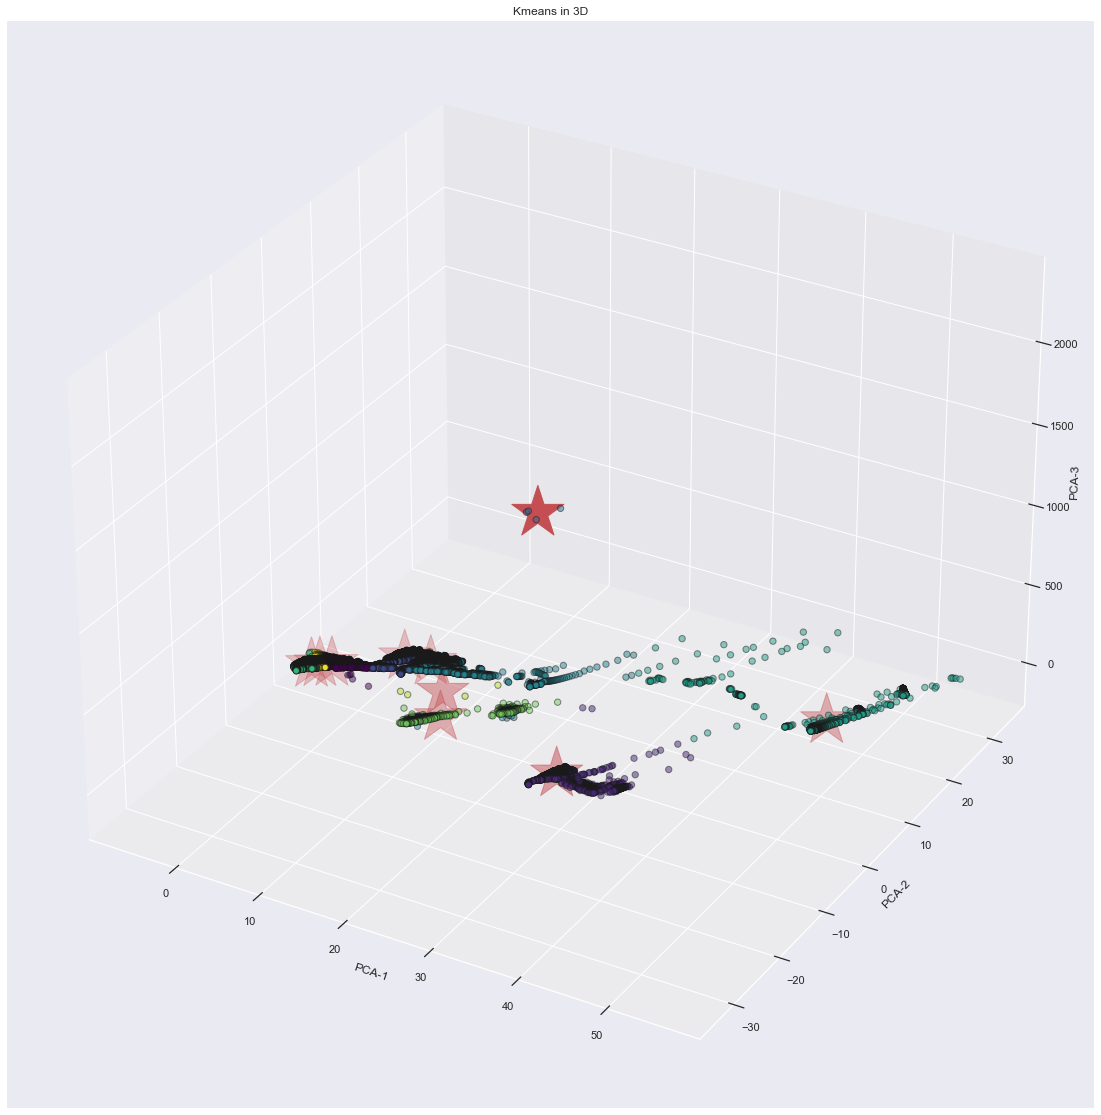

In [18]:
#Kmeans in 10 clusters

kmeans_PCA = KMeans(n_clusters=10, random_state=3)

y_kmeans_PCA = kmeans_PCA.fit_predict(ARP_data_3d_pca)
y_kmeans_PCA

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ARP_data_3d_pca[:,0], ARP_data_3d_pca[:,1], ARP_data_3d_pca[:,2], c=y_kmeans_PCA, cmap='viridis', edgecolor='k', s=40, alpha = 0.5)


ax.set_title("Kmeans in 3D")
ax.set_xlabel("PCA-1")
ax.set_ylabel("PCA-2")
ax.set_zlabel("PCA-3")
ax.dist = 10

ax.scatter(kmeans_PCA.cluster_centers_[:,0], kmeans_PCA.cluster_centers_[:,1], 
           kmeans_PCA.cluster_centers_[:,2], 
           s = 3000, c = 'r', marker='*', label = 'Centroid')
   

plt.show()

## Method 4 PCA + t-SNE dimensional reduction

This method uses PCA to reduce the data to 3D then uses t-SNE to be reduced in two dimensions 

t-SNE = t-Distributed stochastic neighbor embedding (t-SNE), minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding

For the reason that t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical and the memory requirements become too large.

We used this technique to randomly choose from 100000, 10000, 1000 data points. 

In [ ]:
#get all the names of features
features = ARP_df.columns

# Create features datasets
X = ARP_df[features].values

tsne = TSNE()

ARP_data_tsne = tsne.fit_transform(X)

#Visualize the dataset now reduced in 2D
plt.subplots(figsize=(20,20))
plt.scatter(ARP_data_tsne[:,0], ARP_tsne[:,1])
plt.show

In [3]:
#random permutation of the df shape size, 
#to be later used when selection a subset of the data
rndperm = np.random.permutation(ARP_df.shape[0])

In [12]:
#get all the names of features
features = ARP_df.columns

N = 100000
ARP_df_subset = ARP_df.loc[rndperm[:N],:].copy()


data_subset = ARP_df_subset[features].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

ARP_df_subset['pca-one'] = pca_result[:,0]
ARP_df_subset['pca-two'] = pca_result[:,1] 
ARP_df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.8301088  0.16216489 0.00652751]


In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 100000 samples in 1.143s...
[t-SNE] Computed neighbors for 100000 samples in 9.276s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

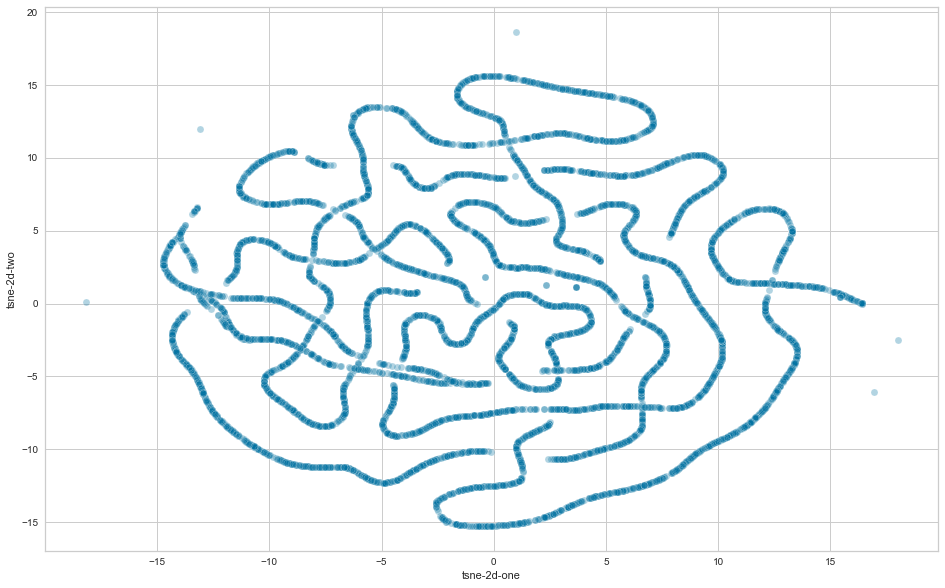

In [11]:
#N = 10000

ARP_df_subset['tsne-2d-one'] = tsne_results[:,0]
ARP_df_subset['tsne-2d-two'] = tsne_results[:,1]


plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", palette=sns.color_palette("hls", 10), data=ARP_df_subset, legend="full", alpha=0.3)

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

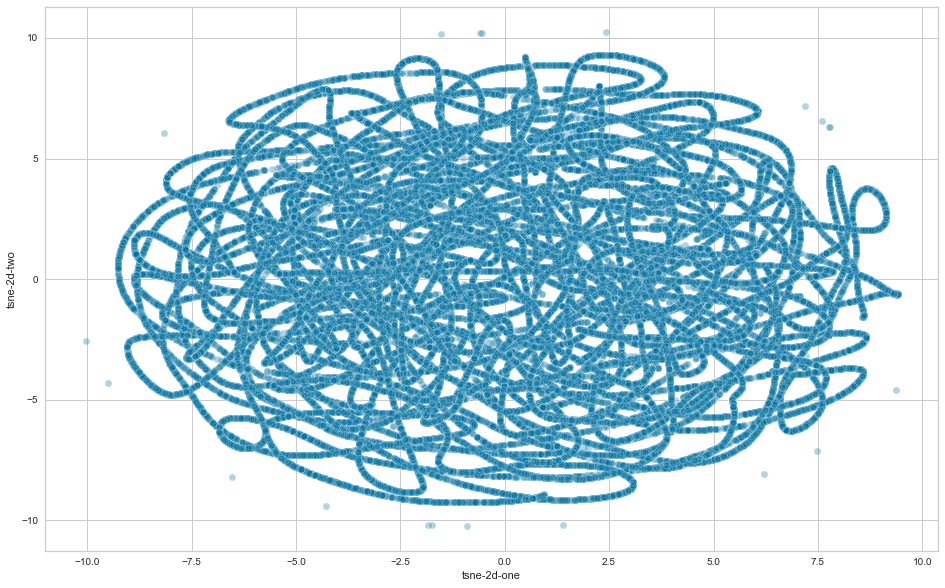

In [14]:
#N = 100000

ARP_df_subset['tsne-2d-one'] = tsne_results[:,0]
ARP_df_subset['tsne-2d-two'] = tsne_results[:,1]


plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", palette=sns.color_palette("hls", 10), data=ARP_df_subset, legend="full", alpha=0.3)

In [15]:
#get all the names of features
features = ARP_df.columns

N = 1000
ARP_df_subset = ARP_df.loc[rndperm[:N],:].copy()


data_subset = ARP_df_subset[features].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

ARP_df_subset['pca-one'] = pca_result[:,0]
ARP_df_subset['pca-two'] = pca_result[:,1] 
ARP_df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [9.98649566e-01 1.30744859e-03 3.62005887e-05]


In [16]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.007s...
[t-SNE] Computed neighbors for 1000 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 16531152.552220
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.179466
[t-SNE] KL divergence after 300 iterations: 0.270126
t-SNE done! Time elapsed: 1.1160283088684082 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

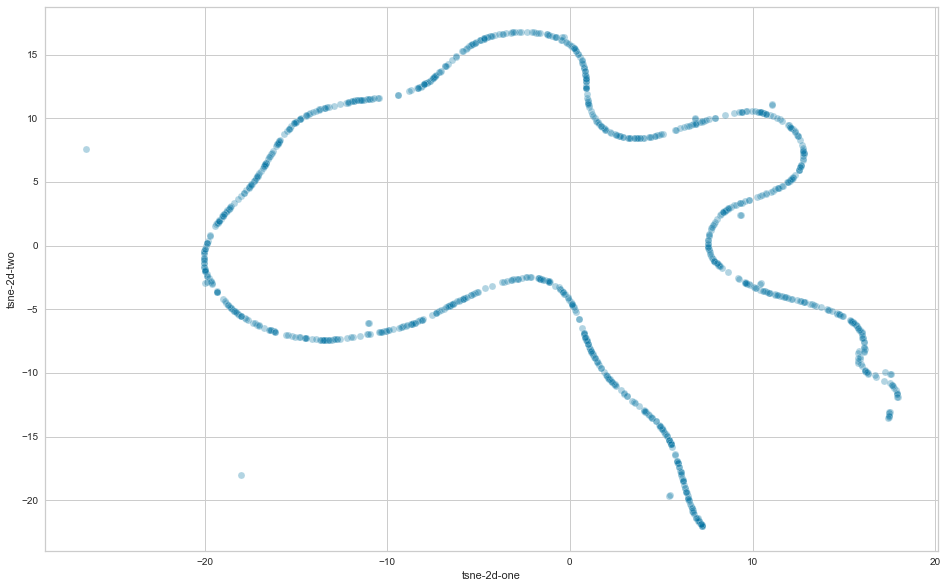

In [17]:
#N = 1000

ARP_df_subset['tsne-2d-one'] = tsne_results[:,0]
ARP_df_subset['tsne-2d-two'] = tsne_results[:,1]


plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", palette=sns.color_palette("hls", 10), data=ARP_df_subset, legend="full", alpha=0.3)